<img src="https://www.bertelsmann.com.br/typo3conf/ext/brtlsmann/Resources/Public/divisions/arvato-logo-213x154px.png" width="150" height="150">

## Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services
<b>Éverton Bin</b>
<br>

## I. Introduction
In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and have not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

### Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## II. Table of Contents
### [Part 1: Customer Segmentation Report](#part1)
#### [1.1 Data Overview](#overview)

#### $\;\;\;\;\;$[1.2 Cleaning Data](#cleandata)
#### $\;\;\;\;\;$[1.2.1 NaN and Unknown Values](#nanunknown)
#### $\;\;\;\;\;$[1.2.2 Non-Informative Columns](#noninform)
#### $\;\;\;\;\;$[1.2.3 Columns' Types](#coltype)
#### $\;\;\;\;\;$[1.2.4 Feature Engineering](#feateng)
#### $\;\;\;\;\;$[1.2.5 Correlation Analysis](#corranalysis)
#### $\;\;\;\;\;$[1.2.6 Applying Data Cleaning on Customer Data](#cleancustomer)

#### [1.3 Exploratory Data Analysis](#eda)
#### $\;\;\;\;\;$[1.3.1 Age](#age)
#### $\;\;\;\;\;$[1.3.2 Youth Movements](#youthmov)
#### $\;\;\;\;\;$[1.3.3 Location](#location)
#### $\;\;\;\;\;$[1.3.4 Consumer Classification](#cameo)
#### $\;\;\;\;\;$[1.3.5 Income](#income)
#### $\;\;\;\;\;$[1.3.6 Habits and Other Curiosities](#habits)

#### [1.4 The WIse-Conscious Avant-Gardes](#report)

#### [1.5 Cluster Analysis](#cluster)
#### $\;\;\;\;\;$[1.5.1 Feature Engineering](#feateng)
#### $\;\;\;\;\;$[1.5.2 NaN Values](#nan)
#### $\;\;\;\;\;$[1.5.3 Standardizing Data](#standard)
#### $\;\;\;\;\;$[1.5.4 Dimensionality Reduction](#pca)
#### $\;\;\;\;\;$[1.5.5 Defining the Number of Clusters](#nclusters)
#### $\;\;\;\;\;$[1.5.6 Applying Transformations on Customer Data](#transcustomer)
#### $\;\;\;\;\;$[1.5.7 Clustering](#clustering)
#### $\;\;\;\;\;$[1.5.8 Evaluating Clusters](#clustereval)
#### $\;\;\;\;\;\;\;\;\;\;$[1.5.8.1 Overrepresented Clusters](#over)
#### $\;\;\;\;\;\;\;\;\;\;$[1.5.8.2 Underrepresented Clusters](#under)
<br>
    
### [Part 2: Supervised Learning Model](#part2)
#### [2.1 Data Transformation](#datatrans)

#### [2.2 Analyzing Learning Curves](#learningcurve)

#### [2.3 Training Classifiers](#training)
#### $\;\;\;\;\;$[2.3.1 Training on Unbalanced Data](#t1)
#### $\;\;\;\;\;$[2.3.2 Training on Balanced Data](#t2)
#### $\;\;\;\;\;$[2.3.3 Using Information Level, PCA, and Truncated SVD](#t3)
#### $\;\;\;\;\;$[2.3.4 Using PCA Transformation](#t4)
#### $\;\;\;\;\;$[2.3.5 XGBoost Classifier and Bayesian Optimization](#t5)
#### $\;\;\;\;\;$[2.3.6 LightGBM and Bayesian Optimization](#t6)
<br>
    
### [Part 3: Kaggle Competition](#part3)
#### [3.1 Attempt 1: Training on Unbalanced Data](#p1)

#### [3.2 Attempt 2: Training on Balanced Data](#p2)

#### [3.3 Attempt 3: Information Level, PCA, and TruncatedSVD](#p3)

#### [3.4 Attempt 4: PCA Transformation](#p4)

#### [3.5 Attempt 5: XGBoost Classifier and Bayesian Optimization](#p5)

#### [3.6 Attempt 6: LightGBM and Bayesian Optimization](#p6)

### [4. Conclusion](#conclusion)
<br>


In [148]:
# Importing libraries:
import joblib
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# magic word for producing visualizations in notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Part 1: Customer Segmentation Report<a name="part1"></a>

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

### 1.1 Data Overview<a name="overview"></a>

In [2]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')

# Loading general population data:
azdias = joblib.load('azdias')

In [3]:
# Checking general population demographics first rows:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
# Verifying dataframe's shape:
print('General population dataframe has {} observations and {} variables.'.format(azdias.shape[0], azdias.shape[1]))

General population dataframe has 891221 observations and 366 variables.


### 1.2 Cleaning Data<a name="cleandata"></a>

#### 1.2.1 NaN and Unkown Values<a name="nanunknown"></a>

Since there is a large number of columns, it's possible to be conservative eliminating columns with many `nan` values. In this case, columns with more than 35% of these values will be deleted.

First, variables will be mapped in order to check if there are unknown values that are represented by one specific class. In that case, these unknown values will be transformed into `nan` values as well.

In [5]:
# Mapping unknown values by variable:
unknown_dict = {'CAMEO_DEU_2015': ['XX'], 'CAMEO_INTL_2015': ['XX'], 'CAMEO_DEUG_2015': ['X'], 'AGER_TYP': [-1, 0], 
                'ALTER_HH': [0], 'ARBEIT': [9], 'D19_BANKEN_ANZ_12': [0], 'D19_BANKEN_ANZ_24': [0], 'D19_BANKEN_DATUM': [10], 
                'D19_BANKEN_DIREKT': [0], 'D19_BANKEN_GROSS': [0], 'D19_BANKEN_LOKAL': [0], 'D19_BANKEN_OFFLINE_DATUM': [10], 
                'D19_BANKEN_ONLINE_DATUM': [10], 'D19_BANKEN_ONLINE_QUOTE_12': [0, 10], 'D19_BANKEN_REST': [0], 
                'D19_BEKLEIDUNG_GEH': [0], 'D19_BEKLEIDUNG_REST': [0], 'D19_BILDUNG': [0], 'D19_BIO_OEKO': [0], 
                'D19_BUCH_CD': [0], 'D19_DIGIT_SERV': [0], 'D19_DROGERIEARTIKEL': [0], 'D19_ENERGIE': [0], 'D19_FREIZEIT': [0], 
                'D19_GARTEN': [0], 'D19_GESAMT_ANZ_12': [0], 'D19_GESAMT_ANZ_24': [0], 'D19_GESAMT_DATUM': [10], 
                'D19_GESAMT_OFFLINE_DATUM': [10], 'D19_GESAMT_ONLINE_DATUM': [10], 'D19_GESAMT_ONLINE_QUOTE_12': [0,10],
                'D19_HANDWERK': [0], 'D19_HAUS_DEKO': [0], 'D19_KINDERARTIKEL': [0], 'D19_KONSUMTYP': [9], 
                'D19_KONSUMTYP_MAX': [8, 9], 'D19_KOSMETIK': [0], 'D19_LEBENSMITTEL': [0], 'D19_LOTTO': [0], 
                'D19_SOZIALES': [0], 'D19_NAHRUNGSERGAENZUNG': [0], 'D19_RATGEBER': [0], 'D19_REISEN': [0], 
                'D19_SAMMELARTIKEL': [0], 'D19_SCHUHE': [0], 'D19_SONSTIGE': [0], 'D19_TECHNIK': [0], 'D19_TELKO_ANZ_12': [0], 
                'D19_TELKO_ANZ_24': [0], 'D19_TELKO_DATUM': [10], 'D19_TELKO_MOBILE': [0], 'D19_TELKO_OFFLINE_DATUM': [10], 
                'D19_TELKO_ONLINE_DATUM': [10], 'D19_TELKO_ONLINE_QUOTE_12': [0, 10], 'D19_VERSAND_ONLINE_QUOTE_12': [0, 10], 
                'D19_VERSI_ONLINE_QUOTE_12': [0, 10], 'D19_TELKO_REST': [0], 'D19_TIERARTIKEL': [0], 'D19_VERSAND_ANZ_12': [0], 
                'D19_VERSAND_ANZ_24': [0], 'D19_VERSAND_DATUM': [10], 'D19_VERSAND_OFFLINE_DATUM': [10], 
                'D19_VERSAND_ONLINE_DATUM': [10], 'D19_VERSAND_REST': [0], 'D19_VERSI_ANZ_12': [0], 'D19_VERSI_ANZ_24': [0], 
                'D19_VERSI_DATUM': [10], 'D19_VERSI_OFFLINE_DATUM': [10], 'D19_VERSI_ONLINE_DATUM': [10], 
                'D19_VERSICHERUNGEN': [0], 'D19_VOLLSORTIMENT': [0], 'D19_WEIN_FEINKOST': [0], 'GEBURTSJAHR': [0], 
                'HEALTH_TYP': [-1], 'KBA05_ALTER1': [9], 'KBA05_ALTER2': [9], 'KBA05_ALTER3': [9], 'KBA05_ALTER4': [9], 
                'KBA05_ANHANG': [9], 'KBA05_AUTOQUOT': [9], 'KBA05_BAUMAX': [0], 'KBA05_CCM1': [9], 'KBA05_CCM2': [9], 
                'KBA05_CCM3': [9], 'KBA05_CCM4': [9], 'KBA05_DIESEL': [9], 'KBA05_FRAU': [9], 'KBA05_HERST1': [9], 
                'KBA05_HERST2': [9], 'KBA05_HERST3': [9], 'KBA05_HERST4': [9], 'KBA05_HERST5': [9], 'KBA05_HERSTTEMP': [9], 
                'KBA05_KRSAQUOT': [9], 'KBA05_KRSHERST1': [9], 'KBA05_KRSHERST2': [9], 'KBA05_KRSHERST3': [9], 
                'KBA05_KRSKLEIN': [9], 'KBA05_KRSOBER': [9], 'KBA05_KRSVAN': [9], 'KBA05_KRSZUL': [9], 'KBA05_KW1': [9], 
                'KBA05_KW2': [9], 'KBA05_KW3': [9], 'KBA05_MAXAH': [9], 'KBA05_MAXBJ': [9], 'KBA05_MAXHERST': [9], 
                'KBA05_MAXSEG': [9], 'KBA05_MAXVORB': [9], 'KBA05_MOD1': [9], 'KBA05_MOD2': [9], 'KBA05_MOD3': [9], 
                'KBA05_MOD4': [9], 'KBA05_MOD8': [9], 'KBA05_MODTEMP': [6], 'KBA05_MOTOR': [9], 'KBA05_MOTRAD': [9], 
                'KBA05_SEG1': [9], 'KBA05_SEG10': [9], 'KBA05_SEG2': [9], 'KBA05_SEG3': [9], 'KBA05_SEG4': [9], 
                'KBA05_SEG5': [9], 'KBA05_SEG6': [9], 'KBA05_SEG7': [9], 'KBA05_SEG8': [9], 'KBA05_SEG9': [9], 
                'KBA05_VORB0': [9], 'KBA05_VORB1': [9], 'KBA05_VORB2': [9], 'KBA05_ZUL1': [9], 'KBA05_ZUL2': [9], 
                'KBA05_ZUL3': [9], 'KBA05_ZUL4': [9], 'KKK': [0], 'KOMBIALTER': [9], 'LP_LEBENSPHASE_FEIN': [0], 
                'LP_LEBENSPHASE_GROB': [0], 'NATIONALITAET_KZ': [0], 'ORTSGR_KLS9': [0], 'PRAEGENDE_JUGENDJAHRE': [0], 
                'REGIOTYP': [0], 'RELAT_AB': [9], 'RT_UEBERGROESSE': [0], 'SHOPPER_TYP': [-1], 'TITEL_KZ': [0], 
                'VERS_TYP': [-1], 'W_KEIT_KIND_HH': [0], 'WOHNLAGE': [0], 'ALTERSKATEGORIE_GROB': [9]}

In [6]:
# Organizing dataframe structure (column dtypes and adding together unknown and nan values):
def join_nan_with_unknown(df, unknown = unknown_dict):
    '''
    It maps unknown values by column and transform them to nan values.
    
    Input:
    df: original dataframe;
    unkown: dictionary mapping columns and their respective known values' classes.
    
    Output:
    df: transformed dataframe.
    '''
    # Looping through columns with unkown values:
    for col in list(unknown.keys()):
        df[col] = [np.nan if df[col].iloc[i] in unknown[col] else df[col].iloc[i] for i in range(df.shape[0])]
                
    return df

In [7]:
# Apllying join_nan_with_unknown on the azdias dataframe:
azdias = join_nan_with_unknown(azdias)

In [8]:
# Creating a list of variables that overcomes the threshold for nan values:
nan_threshold = 0.35 # 35%

# Nan proportion, using general population dataframe (more observations):
var_nan_prop = azdias.isnull().mean()

# List:
nan_list = list()
for i in range(len(var_nan_prop)):
    if var_nan_prop[i] >= nan_threshold:
        nan_list.append(var_nan_prop.index.values[i])

print('{} columns with more than {}% of nan values.'.format(len(nan_list), nan_threshold*100))

77 columns with more than 35.0% of nan values.


In [270]:
# Creating function that delete the columns listed in nan_list:
def eliminate_nan_columns(df, nan_cols = nan_list):
    '''
    It deletes dataframe columns in nan_cols list.
    
    Inputs:
    df: original dataframe;
    nan_cols:list of columns to be deleted.
    
    Output:
    df: dataframe updated without nan_cols.
    '''
    # Deleting nan_cols:
    df.drop(columns = nan_cols, inplace = True)
    
    return df

In [10]:
# Apllying eliminate_nan_columns on the azdias dataframe:
azdias = eliminate_nan_columns(azdias)

#### 1.2.2 Non-Informative Columns<a name="noninform"></a>

In [11]:
# Defining function to drop useless columns:
def drop_useless_cols(df):
    '''
    It deletes columns with no usefull information on people ('LNR' and 'EINGEFUEGT_AM').
    
    Input:
    df: original dataframe.
    
    Output:
    df: updated dataframe.
    '''
    # Deleting columns:
    df.drop(columns = ['LNR', 'EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR'], inplace = True)
    
    return df

In [12]:
# Apllying drop_useless_cols on the azdias dataframe:
azdias = drop_useless_cols(azdias)

#### 1.2.3 Columns' Types<a name="coltype"></a>

In [13]:
# Mapping dtypes by variable:
dtypes_dict = {'AKT_DAT_KL': 'num', 'ALTER_HH': 'num', 'ALTERSKATEGORIE_FEIN': 'num', 'ANZ_HAUSHALTE_AKTIV': 'num', 
               'ANZ_HH_TITEL': 'num', 'ANZ_KINDER': 'num', 'ANZ_PERSONEN': 'num', 'ANZ_STATISTISCHE_HAUSHALTE': 'num', 
               'ANZ_TITEL': 'num', 'ARBEIT': 'num', 'BALLRAUM': 'num', 'CAMEO_DEU_2015': 'cat', 'CAMEO_DEUG_2015': 'num', 
               'CAMEO_INTL_2015': 'num', 'CJT_GESAMTTYP': 'cat', 'CJT_KATALOGNUTZER': 'num', 'CJT_TYP_1': 'num', 
               'CJT_TYP_2': 'num', 'CJT_TYP_3': 'num', 'CJT_TYP_4': 'num', 'CJT_TYP_5': 'num', 'CJT_TYP_6': 'num', 
               'D19_LETZTER_KAUF_BRANCHE': 'cat', 'DSL_FLAG': 'bin', 'EWDICHTE': 'num', 'FINANZ_ANLEGER': 'num', 
               'FINANZ_HAUSBAUER': 'num', 'FINANZ_MINIMALIST': 'num', 'FINANZ_SPARER': 'num', 'FINANZ_UNAUFFAELLIGER': 'num', 
               'FINANZ_VORSORGER': 'num', 'FINANZTYP': 'cat', 'FIRMENDICHTE': 'num', 'GEBAEUDETYP': 'cat', 
               'GEBAEUDETYP_RASTER': 'num', 'GEMEINDETYP': 'cat', 'GFK_URLAUBERTYP': 'cat', 'GREEN_AVANTGARDE': 'bin', 
               'HEALTH_TYP': 'cat', 'HH_DELTA_FLAG': 'bin', 'HH_EINKOMMEN_SCORE': 'num', 'INNENSTADT': 'num', 
               'KBA05_ALTER1': 'num', 'KBA05_ALTER2': 'num', 'KBA05_ALTER3': 'num', 'KBA05_ALTER4': 'num', 
               'KBA05_ANHANG': 'num', 'KBA05_ANTG1': 'num', 'KBA05_ANTG2': 'num', 'KBA05_ANTG3': 'num', 'KBA05_ANTG4': 'num', 
               'KBA05_AUTOQUOT': 'num', 'KBA05_CCM1': 'num', 'KBA05_CCM2': 'num', 'KBA05_CCM3': 'num', 'KBA05_CCM4': 'num', 
               'KBA05_DIESEL': 'num', 'KBA05_FRAU': 'num', 'KBA05_GBZ': 'num', 'KBA05_HERST1': 'num', 'KBA05_HERST2': 'num', 
               'KBA05_HERST3': 'num', 'KBA05_HERST4': 'num', 'KBA05_HERST5': 'num', 'KBA05_HERSTTEMP': 'cat', 
               'KBA05_KRSAQUOT': 'num', 'KBA05_KRSHERST1': 'num', 'KBA05_KRSHERST2': 'num', 'KBA05_KRSHERST3': 'num', 
               'KBA05_KRSKLEIN': 'num', 'KBA05_KRSOBER': 'num', 'KBA05_KRSVAN': 'num', 'KBA05_KRSZUL': 'num', 
               'KBA05_KW1': 'num', 'KBA05_KW2': 'num', 'KBA05_KW3': 'num', 'KBA05_MAXAH': 'num', 'KBA05_MAXBJ': 'num', 
               'KBA05_MAXHERST': 'cat', 'KBA05_MAXSEG': 'num', 'KBA05_MAXVORB': 'num', 'KBA05_MOD1': 'num', 
               'KBA05_MOD2': 'num', 'KBA05_MOD3': 'num', 'KBA05_MOD4': 'num', 'KBA05_MOD8': 'num', 'KBA05_MODTEMP': 'cat', 
               'KBA05_MOTOR': 'num', 'KBA05_MOTRAD': 'num', 'KBA05_SEG1': 'num', 'KBA05_SEG10': 'num', 'KBA05_SEG2': 'num', 
               'KBA05_SEG3': 'num', 'KBA05_SEG4': 'num', 'KBA05_SEG5': 'num', 'KBA05_SEG6': 'num', 'KBA05_SEG7': 'num', 
               'KBA05_SEG8': 'num', 'KBA05_SEG9': 'num', 'KBA05_VORB0': 'num', 'KBA05_VORB1': 'num', 'KBA05_VORB2': 'num', 
               'KBA05_ZUL1': 'num', 'KBA05_ZUL2': 'num', 'KBA05_ZUL3': 'num', 'KBA05_ZUL4': 'num', 
               'KBA13_ALTERHALTER_30': 'num', 'KBA13_ALTERHALTER_45': 'num', 'KBA13_ALTERHALTER_60': 'num', 
               'KBA13_ALTERHALTER_61': 'num', 'KBA13_ANTG1': 'num', 'KBA13_ANTG2': 'num', 'KBA13_ANTG3': 'num', 
               'KBA13_ANTG4': 'num', 'KBA13_ANZAHL_PKW': 'num', 'KBA13_AUDI': 'num', 'KBA13_AUTOQUOTE': 'num', 
               'KBA13_BAUMAX': 'num', 'KBA13_BJ_1999': 'num', 'KBA13_BJ_2000': 'num', 'KBA13_BJ_2004': 'num', 
               'KBA13_BJ_2006': 'num', 'KBA13_BJ_2008': 'num', 'KBA13_BJ_2009': 'num', 'KBA13_BMW': 'num', 
               'KBA13_CCM_0_1400': 'num', 'KBA13_CCM_1000': 'num', 'KBA13_CCM_1200': 'num', 'KBA13_CCM_1400': 'num', 
               'KBA13_CCM_1401_2500': 'num', 'KBA13_CCM_1500': 'num', 'KBA13_CCM_1600': 'num', 'KBA13_CCM_1800': 'num', 
               'KBA13_CCM_2000': 'num', 'KBA13_CCM_2500': 'num', 'KBA13_CCM_2501': 'num', 'KBA13_CCM_3000': 'num', 
               'KBA13_CCM_3001': 'num', 'KBA13_FAB_ASIEN': 'num', 'KBA13_FAB_SONSTIGE': 'num', 'KBA13_FIAT': 'num', 
               'KBA13_FORD': 'num', 'KBA13_GBZ': 'num', 'KBA13_HALTER_20': 'num', 'KBA13_HALTER_25': 'num', 
               'KBA13_HALTER_30': 'num', 'KBA13_HALTER_35': 'num', 'KBA13_HALTER_40': 'num', 'KBA13_HALTER_45': 'num', 
               'KBA13_HALTER_50': 'num', 'KBA13_HALTER_55': 'num', 'KBA13_HALTER_60': 'num', 'KBA13_HALTER_65': 'num', 
               'KBA13_HALTER_66': 'num', 'KBA13_HERST_ASIEN': 'num', 'KBA13_HERST_AUDI_VW': 'num', 
               'KBA13_HERST_BMW_BENZ': 'num', 'KBA13_HERST_EUROPA': 'num', 'KBA13_HERST_FORD_OPEL': 'num', 
               'KBA13_HERST_SONST': 'num', 'KBA13_HHZ': 'num', 'KBA13_KMH_0_140': 'num', 'KBA13_KMH_110': 'num', 
               'KBA13_KMH_140': 'num', 'KBA13_KMH_140_210': 'num', 'KBA13_KMH_180': 'num', 'KBA13_KMH_210': 'num', 
               'KBA13_KMH_211': 'num', 'KBA13_KMH_250': 'num', 'KBA13_KMH_251': 'num', 'KBA13_KRSAQUOT': 'num', 
               'KBA13_KRSHERST_AUDI_VW': 'num', 'KBA13_KRSHERST_BMW_BENZ': 'num', 'KBA13_KRSHERST_FORD_OPEL': 'num', 
               'KBA13_KRSSEG_KLEIN': 'num', 'KBA13_KRSSEG_OBER': 'num', 'KBA13_KRSSEG_VAN': 'num', 'KBA13_KRSZUL_NEU': 'num', 
               'KBA13_KW_0_60': 'num', 'KBA13_KW_110': 'num', 'KBA13_KW_120': 'num', 'KBA13_KW_121': 'num', 
               'KBA13_KW_30': 'num', 'KBA13_KW_40': 'num', 'KBA13_KW_50': 'num', 'KBA13_KW_60': 'num', 
               'KBA13_KW_61_120': 'num', 'KBA13_KW_70': 'num', 'KBA13_KW_80': 'num', 'KBA13_KW_90': 'num', 
               'KBA13_MAZDA': 'num', 'KBA13_MERCEDES': 'num', 'KBA13_MOTOR': 'num', 'KBA13_NISSAN': 'num', 'KBA13_OPEL': 'num', 
               'KBA13_PEUGEOT': 'num', 'KBA13_RENAULT': 'num', 'KBA13_SEG_GELAENDEWAGEN': 'num', 
               'KBA13_SEG_GROSSRAUMVANS': 'num', 'KBA13_SEG_KLEINST': 'num', 'KBA13_SEG_KLEINWAGEN': 'num', 
               'KBA13_SEG_KOMPAKTKLASSE': 'num', 'KBA13_SEG_MINIVANS': 'num', 'KBA13_SEG_MINIWAGEN': 'num', 
               'KBA13_SEG_MITTELKLASSE': 'num', 'KBA13_SEG_OBEREMITTELKLASSE': 'num', 'KBA13_SEG_OBERKLASSE': 'num', 
               'KBA13_SEG_SONSTIGE': 'num', 'KBA13_SEG_SPORTWAGEN': 'num', 'KBA13_SEG_UTILITIES': 'num', 
               'KBA13_SEG_VAN': 'num', 'KBA13_SEG_WOHNMOBILE': 'num', 'KBA13_SITZE_4': 'num', 'KBA13_SITZE_5': 'num', 
               'KBA13_SITZE_6': 'num', 'KBA13_TOYOTA': 'num', 'KBA13_VORB_0': 'num', 'KBA13_VORB_1': 'num', 
               'KBA13_VORB_1_2': 'num', 'KBA13_VORB_2': 'num', 'KBA13_VORB_3': 'num', 'KBA13_VW': 'num', 'KKK': 'num', 
               'KOMBIALTER': 'num', 'KONSUMNAEHE': 'num', 'KONSUMZELLE': 'bin', 'LP_FAMILIE_FEIN': 'cat', 
               'LP_FAMILIE_GROB': 'num', 'LP_LEBENSPHASE_FEIN': 'cat', 'LP_LEBENSPHASE_GROB': 'cat', 'LP_STATUS_FEIN': 'num', 
               'LP_STATUS_GROB': 'num', 'MIN_GEBAEUDEJAHR': 'num', 'MOBI_RASTER': 'num', 'MOBI_REGIO': 'num', 
               'NATIONALITAET_KZ': 'cat', 'ONLINE_AFFINITAET': 'num', 'ORTSGR_KLS9': 'num', 'OST_WEST_KZ': 'cat', 
               'PLZ8_ANTG1': 'num', 'PLZ8_ANTG2': 'num', 'PLZ8_ANTG3': 'num', 'PLZ8_ANTG4': 'num', 'PLZ8_BAUMAX': 'cat', 
               'PLZ8_GBZ': 'num', 'PLZ8_HHZ': 'num', 'PRAEGENDE_JUGENDJAHRE': 'num', 'REGIOTYP': 'num', 'RELAT_AB': 'num', 
               'RETOURTYP_BK_S': 'cat', 'RT_KEIN_ANREIZ': 'num', 'RT_SCHNAEPPCHEN': 'num', 'RT_UEBERGROESSE': 'num', 
               'SEMIO_DOM': 'num', 'SEMIO_ERL': 'num', 'SEMIO_FAM': 'num', 'SEMIO_KAEM': 'num', 'SEMIO_KRIT': 'num', 
               'SEMIO_KULT': 'num', 'SEMIO_LUST': 'num', 'SEMIO_MAT': 'num', 'SEMIO_PFLICHT': 'num', 'SEMIO_RAT': 'num', 
               'SEMIO_REL': 'num', 'SEMIO_SOZ': 'num', 'SEMIO_TRADV': 'num', 'SEMIO_VERT': 'num', 'SHOPPER_TYP': 'cat', 
               'SOHO_KZ': 'bin', 'STRUKTURTYP': 'cat', 'UMFELD_ALT': 'num', 'UMFELD_JUNG': 'num', 'UNGLEICHENN_FLAG': 'bin', 
               'VERDICHTUNGSRAUM': 'num', 'VERS_TYP': 'cat', 'VHA': 'num', 'VHN': 'num', 'VK_DHT4A': 'num', 
               'VK_DISTANZ': 'num', 'VK_ZG11': 'num', 'W_KEIT_KIND_HH': 'num', 'WOHNDAUER_2008': 'num', 'WOHNLAGE': 'cat', 
               'ZABEOTYP': 'cat', 'ANREDE_KZ': 'cat', 'ALTERSKATEGORIE_GROB': 'num'}

In [14]:
# Defiing funtion to change dtypes according to dtypes_dict:
def change_dtypes(df, dtypes = dtypes_dict):
    '''
    It transforms columns dtypes according to dtypes dictionary.
    
    Inputs:
    df: original dataframe;
    dtypes: dictionary mapping columns and dtypes.
    
    Output:
    df: transformed dataframe.
    '''
    # Correcting columns with two types:
    for col in list(dtypes.keys()):
        if dtypes[col] == 'cat':
            df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_numeric(df[col], errors = 'coerce')
            
    return df

In [15]:
# Apllying change_dtypes on the azdias dataframe:
azdias = change_dtypes(azdias)

#### 1.2.4 Feature Engineering<a name="feateng"></a>

In the process of going through each one of the features, two features caught the attention for containing more than one apparently important information: 
* `CAMEO_INTL_2015`: it is composed of two numbers, each one relates to 5 different classifications. The first one classifies as *1. Wealthy*, *2. Prosperous*, *3. Comfortable*, *4. Less Affluent*, and *5. Poorer*. The second one classifies as *1. Pre-family couples and singles*, *2. Young couples with children*, *3. Families with school-age children*, *4. Older families and mature couples*, and *5. Elders in retirement*.

* `PRAEGENDE_JUGENDJAHRE`: indicates especially the *youth decade* related to each observation, as well as the related movement that the person was part of (*avant-garde* or *mainstream*).

These observations will be used to create new features that will possibly help through the analysis' process. One another transformation to be performed is to simplify the `ALTER_HH` variable to represent decades.

In [16]:
# Defining function to engineer new features:
def feature_engineer(df):
    '''
    It uses some original features to create new and more informative ones.
    * CAMEO_INTL_2015 splits into CAMEO_INTL_FAM_STATUS and CAMEO_INTL_FAM_COMPOSITION.
    * PRAEGENDE_JUGENDJAHRE splits into YOUTH_DECADE and AVANT_GARDE.
    * ALTER_HH is simplified representing decades.
    
    Input:
    df: original dataframe.
    
    Output:
    df: transformed dataframe.
    '''
    # Target columns to be transformed:
    feat1 = 'CAMEO_INTL_2015'
    feat2 = 'PRAEGENDE_JUGENDJAHRE'
    feat3 = 'ALTER_HH'
    
    # Creating CAMEO_INTL_FAM_STATUS feature:
    df['CAMEO_INTL_FAM_STATUS'] = [int(str(df[feat1].iloc[i])[0]) if str(df[feat1].iloc[i]) != 'nan' \
                                   else np.nan for i in range(df.shape[0])]
    
    # Creating CAMEO_INTL_FAM_COMPOSITION feature:
    df['CAMEO_INTL_FAM_COMPOSITION'] = [int(str(df[feat1].iloc[i])[1]) if str(df[feat1].iloc[i]) != 'nan' \
                                        else np.nan for i in range(df.shape[0])]
    
    # Creating YOUTH_DECADE feature:
    df['YOUTH_DECADE'] = [4 if df[feat2].iloc[i] in [1, 2] \
                          else 5 if df[feat2].iloc[i] in [3, 4] \
                          else 6 if df[feat2].iloc[i] in [5, 6, 7] \
                          else 7 if df[feat2].iloc[i] in [8, 9] \
                          else 8 if df[feat2].iloc[i] in [10, 11, 12, 13] \
                          else 9 if df[feat2].iloc[i] in [14, 15] \
                          else np.nan for i in range(df.shape[0])]
    
    # Creating AVANT_GARDE feature:
    df['AVANT_GARDE'] = [0 if df[feat2].iloc[i] in [1, 3, 5, 8, 10, 12, 14] \
                         else 1 if df[feat2].iloc[i] in [2, 4, 6, 7, 9, 11, 13, 15] \
                         else np.nan for i in range(df.shape[0])]
    
    # Deleting original columns:
    df.drop(columns = [feat1, feat2], inplace = True)
    
    # Simplifying ALTER_HH to represent decades:
    df[feat3] = [1 if df[feat3].iloc[i] in [1, 2, 3] \
                 else 2 if df[feat3].iloc[i] in [4, 5] \
                 else 3 if df[feat3].iloc[i] in [6, 7] \
                 else 4 if df[feat3].iloc[i] in [8, 9] \
                 else 5 if df[feat3].iloc[i] in [10, 11] \
                 else 6 if df[feat3].iloc[i] in [12, 13] \
                 else 7 if df[feat3].iloc[i] in [14, 15] \
                 else 8 if df[feat3].iloc[i] in [16, 17] \
                 else 9 if df[feat3].iloc[i] in [18, 19] \
                 else np.nan for i in range(df.shape[0])]
    
    return df

In [17]:
# Apllying feature_engineer on the azdias dataframe:
azdias = feature_engineer(azdias)

#### 1.2.5 Correlation Analysis<a name="corranalysis"></a>

The next step will be to verify the `correlation` between columns.

Highly correlated features indicate they may represent similar information. Selecting only one of these highly correlated features will help to reduce the number of variables to be considered along in the process.

Since most of the numerical variables represent ordinal classes, the most appropriate correlation analysis would be one using distance or rank approaches. Because of the limited computational power, and considering that these variables represent, in essence, a metric measure, the `Pearson` correlation will be applied in this task.

In [18]:
# Defining function to compute correlation, and return columns and its correlated features:
def analyze_correlation(df, method = 'pearson', corr_threshold = 0.7):
    '''
    It computes the correlation between the variables, selects one among the correlated (the one with
    less nan values), and returns a list of selected columns as well as a dictionary relating selected
    columns with their correlated ones.
    
    Input:
    df: dataframe on which correlation will be computed;
    method: string indicating the method to compute the correlation ('pearson', 'kendall' or 'spearman').
    corr_threshold: absolut correlation threshold to consider columns as being highly correlated.
    
    Outputs:
    cols: list of selected columns;
    corr_dict: dictionary relating selected columns to their correlated features.
    '''
    # Computing correlation:
    corr = df.corr(method = method)
    
    # Creating selected columns list:
    cols = list()
    
    # Creating correlated columns list:
    corr_cols = list()
    
    # Creating correlation dictionary:
    corr_dict = dict()
    
    # Ordering columns by nan values ratio:
    nan_ord_cols = list(df[list(corr.columns)].isnull().mean().index.values)[::-1]
    
    # Looping through columns:
    for col in nan_ord_cols:
        
        # If column doesn't appear as selected column nor as correlated column, verify correlations:
        if (col not in cols) & (col not in corr_cols):
            
            # Add column to selected columns:
            cols.append(col)
            # Initialize list of highly correlated columns:
            col_corr = list()
            
            # Looping through rows:
            for i in range(corr.shape[0]):
                
                # If correlation is higher than threshold:
                if abs(corr[col].iloc[i]) > corr_threshold:
                    # Add feature as a correlated column:
                    corr_cols.append(corr.index.values[i])
                    # Add feature as highly correlated:
                    col_corr.append((corr.index.values[i], corr[col].iloc[i]))
            
            # Assigning highly correlated features:
            corr_dict[col] = col_corr
            
    # Adding columns with no computed correlation:
    for col in df.columns:
        if col not in corr.columns:
            cols.append(col)
            
    # Sorting values:
    cols.sort()
            
    return cols, corr_dict

In [19]:
# Applying analyze_correlation on the azdias dataframe:
sel_cols, corr_dict = analyze_correlation(azdias)

print('{} columns were selected, considering correlations between features.'.format(len(sel_cols)))

218 columns were selected, considering correlations between features.


In [20]:
# Defining function to select features:
def select_features(df, sel = sel_cols):
    '''
    It selects columns presented in the sel list.
    '''
    # Selecting features:
    df = df[sel]
    
    return df

In [21]:
# Applying select_features on the azdias dataframe:
azdias = select_features(azdias)

In [22]:
azdias.head()

,AKT_DAT_KL,ALTERSKATEGORIE_GROB,ANREDE_KZ,ANZ_HH_TITEL,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,AVANT_GARDE,BALLRAUM,...,VERS_TYP,VHA,VHN,VK_DHT4A,VK_ZG11,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,YOUTH_DECADE,ZABEOTYP
0,NaN,2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,9.0,1.0,2,0.0,0.0,12.0,0.0,3.0,0.0,6.0,...,2.0,0.0,4.0,8.0,10.0,9.0,4.0,3.0,9.0,5
2,9.0,3.0,2,0.0,0.0,7.0,0.0,3.0,1.0,2.0,...,1.0,0.0,2.0,9.0,6.0,9.0,2.0,3.0,9.0,5
3,1.0,4.0,2,0.0,0.0,2.0,0.0,2.0,0.0,4.0,...,1.0,1.0,0.0,7.0,11.0,9.0,7.0,NaN,7.0,3
4,1.0,3.0,1,0.0,0.0,3.0,0.0,4.0,0.0,2.0,...,2.0,0.0,2.0,3.0,4.0,9.0,3.0,2.0,7.0,4


#### 1.2.6 Applying Data Cleaning on Customer Dataset<a name="cleancustomer"></a>

In [23]:
# Load in the data:
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

# Loading customers data:
customers = joblib.load('customers')

In [24]:
# Checking customers population demographics first rows:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [25]:
# Verifying dataframe's shape:
print('Customers dataframe has {} observations and {} variables.'.format(customers.shape[0], customers.shape[1]))

Customers dataframe has 191652 observations and 369 variables.


In [26]:
# Defining function to apply data cleaning process on data:
def clean_data(df):
    '''
    It applies data cleaning process on the dataframe.
    
    Input:
    df: original dataframe.
    
    Output:
    df: clean dataframe.
    '''
    # Apllying join_nan_with_unknown on the dataframe:
    df = join_nan_with_unknown(df)
    
    # Apllying eliminate_nan_columns on the dataframe:
    df = eliminate_nan_columns(df)
    
    # Apllying drop_useless_cols on the dataframe:
    df = drop_useless_cols(df)
    
    # Apllying change_dtypes on the dataframe:
    df = change_dtypes(df)
    
    # Apllying feature_engineer on the dataframe:
    df = feature_engineer(df)
    
    # Applying select_features on the dataframe:
    df = select_features(df)
    
    return df

In [27]:
# Applying transformations on the customers data:
customers = clean_data(customers)

In [28]:
customers.head()

,AKT_DAT_KL,ALTERSKATEGORIE_GROB,ANREDE_KZ,ANZ_HH_TITEL,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,AVANT_GARDE,BALLRAUM,...,VERS_TYP,VHA,VHN,VK_DHT4A,VK_ZG11,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,YOUTH_DECADE,ZABEOTYP
0,1.0,4.0,1,0.0,0.0,1.0,0.0,1.0,1.0,3.0,...,1.0,0.0,3.0,5.0,2.0,9.0,7.0,6.0,5.0,3
1,9.0,4.0,1,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,1.0,0.0,NaN,6.0,3.0,9.0,NaN,NaN,NaN,3
2,1.0,4.0,2,0.0,0.0,1.0,0.0,3.0,1.0,7.0,...,2.0,0.0,4.0,10.0,11.0,9.0,2.0,6.0,5.0,3
3,1.0,4.0,1,NaN,0.0,1.0,0.0,1.0,0.0,7.0,...,1.0,0.0,2.0,6.0,2.0,9.0,7.0,NaN,4.0,1
4,1.0,3.0,1,0.0,0.0,7.0,0.0,3.0,0.0,3.0,...,2.0,0.0,4.0,3.0,4.0,9.0,3.0,2.0,7.0,1


With these features cleaning and pre-selection, some *exploratory data analysis* will be performed. 

### 1.3 Exploratory Data Analysis<a name="eda"></a>
<p>
    Through this exploratory analysis, the goal is to understand the company's customer profile and how this profile relates to the general population. The analysis will be focused on answering a few questions:
    <ul>
        <li>How old are the customers?</li>
        <li>Where do they live?</li>
        <li>How are they classified while consumers?</li>
        <li>What about their incomes?</li>
        <li>What are their consumption habits, lifestyle and family composition??</li>
    </ul>
</p>

In [29]:
# Setting seaborn general style:
sns.set_theme(style = "whitegrid", font_scale = 1.1)

# Defining a function to create a comparison barplot:
def customers_against_general(col, customers = customers, general = azdias):
    '''
    Given one variable, it counts the number of observations per class, both for customers and general population, and 
    creates a bor plot comparing the percentages for each group.
    
    Inputs:
    col: string identifying target column to be compared;
    customers: dataframe containing customers' observations;
    general: dataframe contatinig general population's observations.
    '''
    # Counting customers observations for each class:
    cust_series = customers[col].value_counts()
    
    # Counting general population observations for each class:
    pop_series = general[col].value_counts().sort_index()
    
    # Creating dataframe:
    comparison_df = pd.DataFrame(index = pop_series.index.values, \
                                 columns = ['cust_count', 'gen_pop_count', 'customers', 'general_population'])
    comparison_df.gen_pop_count = pop_series.values
    
    # Assigning values to customers column:
    comparison_df.cust_count = [cust_series[cust_series.index == idx].values[0] \
                                if len(cust_series[cust_series.index == idx].values) == 1 \
                                else 0 for idx in comparison_df.index.values]
    
    # Printing percentage of NaN values:
    nan_cust = customers[col].isnull().mean() * 100
    nan_pop = general[col].isnull().mean() * 100
    print('"' + col + '"' + ' VARIABLE INFO:')
    print('{:.2f}% of the customers observations are related to NaN values.'.format(nan_cust))
    print('{:.2f}% of the general population observations are related to NaN values.\n'.format(nan_pop))
    
    # Computing each class' percentage:
    comparison_df.customers = (comparison_df.cust_count / np.sum(comparison_df.cust_count))*100
    comparison_df.general_population = (comparison_df.gen_pop_count / np.sum(comparison_df.gen_pop_count))*100
    
    # Defining xsize plot:
    if len(comparison_df.index) <= 11:
        plot_xsize = 1.5 * len(comparison_df.index)
        
        if plot_xsize < 5:
            plot_xsize = 5
    else:
        plot_xsize = 16.5
    
    comparison_df['Class'] = comparison_df.index.values
    melted_df = pd.melt(comparison_df, id_vars = ['Class'] , value_vars = ['customers', 'general_population'], \
                        var_name = 'Group', value_name ='Percentage')
    palette = {'customers': 'darkcyan', 'general_population': 'springgreen'}
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (plot_xsize, 5))
    sns.barplot(x = 'Class', y = 'Percentage', hue = 'Group', data = melted_df, palette = palette, ax = ax).set(
        title = 'Customers Vs. General Population - "{}"'.format(col))
    sns.despine(left=True, top = True)
    fig.show()

In [30]:
# Defining function to compare statistics:
def stats_comparison(col, customers = customers, general = azdias):
    '''
    It computes variable's statistics (count, mean, standard deviation, min, max, and quartiles) for customers and
    general population and join them together in one dataframe.
    
    Inputs:
    col: string identifying target column;
    customers: dataframe containing customers' observations;
    general: dataframe contatinig general population's observations.
    
    Output:
    stats: dataframe containing statistics for both groups.
    '''
    # Computing customers' statistics:
    cust_stats = customers[col].describe()
    
    # Computing general population's statistics:
    gen_stats = general[col].describe()
    
    # Creating dataframe:
    stats = pd.DataFrame(index = cust_stats.index.values, columns = ['Customers', 'General_Pop'])
    
    # Assigning the values to the respective columns:
    stats.Customers = cust_stats.values
    stats.General_Pop = gen_stats.values
    
    return stats

#### 1.3.1 Age<a name="age"></a>

After the pre-selection of features, the age will be analyzed through the perspective of the `YOUTH_DECADE` variable that represents the decade corresponding to the person's youth. The decades go from the 40'ies to the 90'ies, and considering the youth period from the age of 15 to the age of 25, this variable can be interpreted as follows:
* `4`: *youth in the 40'ies (more than 85 years old)*;
* `5`: *youth in the 50'ies (75 to 85 years old)*;
* `6`: *youth in the 60'ies (65 to 75 years old)*;
* `7`: *youth in the 70'ies (55 to 65 years old)*;
* `8`: *youth in the 80'ies (45 to 55 years old)*;
* `9`: *youth in the 90'ies (less than 45 years old)*.

"YOUTH_DECADE" VARIABLE INFO:
25.30% of the customers observations are related to NaN values.
12.14% of the general population observations are related to NaN values.



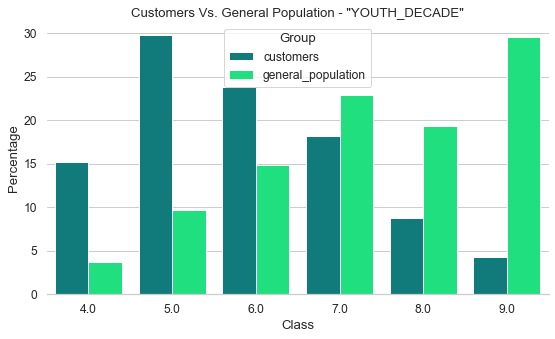

In [31]:
# Applying customers_against_general function to ALTER_HH column:
customers_against_general('YOUTH_DECADE')

In [32]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
youth_dec_stats = stats_comparison('YOUTH_DECADE')
youth_dec_stats

,Customers,General_Pop
count,143165.000000,783057.000000
mean,5.886124,7.332805
std,1.346348,1.459284
min,4.000000,4.000000
25%,5.000000,6.000000
50%,6.000000,7.000000
75%,7.000000,9.000000
max,9.000000,9.000000


While in the general population, most of the people have their youth related to the `90'ies`, among customers that would be the less representative population.

In the customers' group, the most representative classes refer to the `50'ies` and the `60'ies` as the most common youth decades. As an approximation, it would be possible to say that it refers to people that are **between 65 and 85 years old**.

It's interesting no notice that the younger the group is, the less representative it is among clients and the more representative it is in the general population. In other words, elders are overrepresented, while youngers are underrepresented in the customers' group.

This age analysis brings up more questions to be studied and new possibilities to the company:

* Does the interest in organic products comes with the age or is it a matter of reaching out to the new generations?

* Although younger people may not be the direct target to the company, they could also represent a segment to be explored, once this group represents the majority of the general population.

<h4>Age Insights</h4>

* If the company would like to achieve more clients with a profile *similar* to the current clients' profile, then it would be better to focus on **elderly people**.

* Given the underrepresentation of clients with lower ages when comparing to the general population, there is a **great opportunity** to increase the number of clients by reaching out to these generations through, for example, marketing campaigns designed for this specific public.

#### 1.3.2 Youth Movements<a name="youthmov"></a>

`PRAEGENDE_JUGENDJAHRE` was previously split into the `YOUTH_DECADE` and the `AVANT_GARDE` features. Age was analyzed through the first engineered feature, and the second one indicating the dominating movement in the person's youth (avant-garde or mainstream) will be checked now:
* `0`: *not avant-garde (mainstream)*;
* `1`: *avant-garde*.

"AVANT_GARDE" VARIABLE INFO:
25.30% of the customers observations are related to NaN values.
12.14% of the general population observations are related to NaN values.



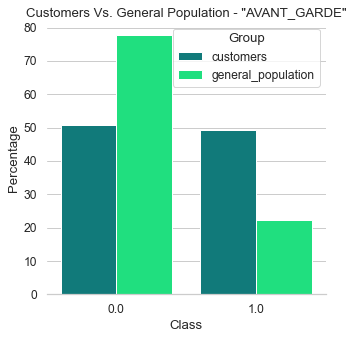

In [33]:
# Applying customers_against_general function to PRAEGENDE_JUGENDJAHRE column:
customers_against_general('AVANT_GARDE')

In [34]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
avant_stats = stats_comparison('AVANT_GARDE')
avant_stats

,Customers,General_Pop
count,143165.000000,783057.00000
mean,0.491524,0.22377
std,0.499930,0.41677
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,1.000000,1.00000


If the analysis was only performed on customers' data, it would be possible to say that clients were equally represented by *avant-gardes* and *mainstreamers*.

When comparing this distribution to the general population, it's possible to see that actually *avant-gardes* are more likely to be interested in the products offered by the mail-order company. While people related to the *avant-garde* movement represent about 20% of the general population, among clients this representation rises up to 50%.

The opposite happens to *mainstreamers*: they represent almost 80% of the general population and about 50% of the customers.

Another important aspect is the fact that, during the correlation analysis, the features `AVANT_GARDE` and `GREEN_AVANTGARDE` presented a perfect positive correlation with each other. It could indicate that, although avant-garde movements may be related to different social/economic aspects through the years, they can always be related in some aspects to the green avant-garde movement.

More studies should be done to prove this theory, but in this brief analysis, it's possible to say that this correlation indicates that the company's clients are more interested in topics related to sustainability, or more concerned about the impacts that people's actions cause on the environment.

Since the *green movement* has been increasing over the years both in society and also in politics, this could be an important aspect to be explored in order to reach younger generations.

<h4>Youth Movements Insights</h4>

* `Avant-gardes` are more interested in the products offered by the company.

* `Mainstreamers` represent almost the same proportion as `avant-gardes` among customers, but they are highly underrepresented when comparing to the general population.

* If the youth movement is compared together with the age (`YOUTH_DECADE`), it's possible to see that for elderly people even the `mainstreamers` group is overrepresented among clients. It indicates that age and movement conditions can reinforce one another.

* The correlation between `avant-garde` and `green avant-garde` movements indicates that this could be an important cultural aspect that could be explored by the company, both for retaining clients and for reaching out to new generations. 

#### 1.3.3 Location<a name="location"></a>

The `BALLRAUM` variable is described as the *distance to next urban center*, and it could give and an indication of where the customers live and how it relates to the general population. Its classes go from `1` to `7`:
* `Class 1`: *until 10 km*;
* `Class 2`: *10 - 20 km*;
* `Class 3`: *20 - 30 km*;
* `Class 4`: *30 - 40 km*;
* `Class 5`: *40 - 50 km*;
* `Class 6`: *50 - 100 km*;
* `Class 7`: *over 100 km*.

"BALLRAUM" VARIABLE INFO:
26.07% of the customers observations are related to NaN values.
10.52% of the general population observations are related to NaN values.



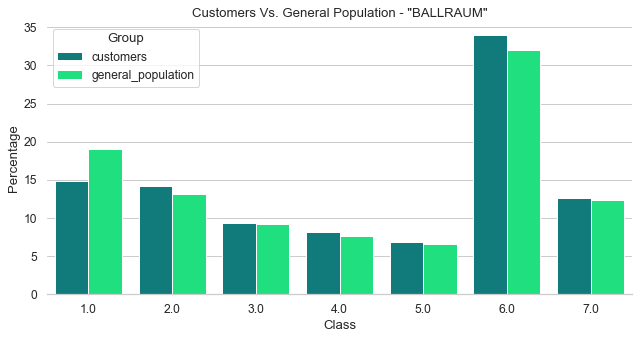

In [35]:
# Applying customers_against_general function to BALLRAUM column:
customers_against_general('BALLRAUM')

In [36]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
ball_stats = stats_comparison('BALLRAUM')
ball_stats

,Customers,General_Pop
count,141693.000000,797481.000000
mean,4.301758,4.153043
std,2.114614,2.183710
min,1.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


Most of the clients live between 50 and 100 km from urban centers, which corresponds to the class `6`. However, this is not a characteristic that *specifically* defines the company's customers, since it follows the distribution of the general population.

Looking both at the bar plot and the statistics, it's clear that the general population and the customers follow the same distribution, meaning that equal proportions of the population in different urban centers positions are being reached.

The highest difference appears in class `1` that represents people living up to 10 km from the urban center. It makes sense, once it's a mail-order company, and people close to urban centers may have more possibilities of buying these products directly in the companies.

`REGIOTYP` classifies people according to their neighbourhood:
* `0`: *unknown*;
* `1`: *upper class*;
* `2`: *conservatives*;
* `3`: *upper middle class*;
* `4`: *middle class*;
* `5`: *lower middle class*;
* `6`: *traditional workers*;
* `7`: *marginal groups*.

"REGIOTYP" VARIABLE INFO:
31.34% of the customers observations are related to NaN values.
17.74% of the general population observations are related to NaN values.



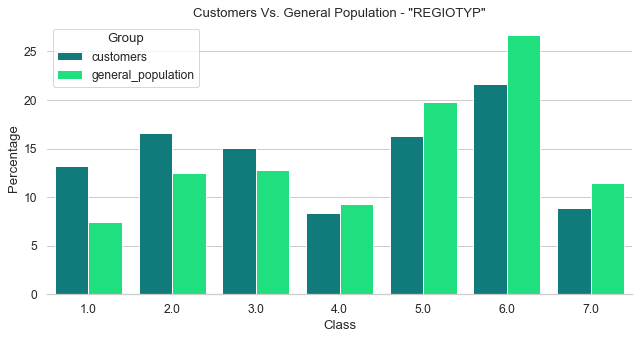

In [37]:
# Applying customers_against_general function to BALLRAUM column:
customers_against_general('REGIOTYP')

In [38]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
regio_stats = stats_comparison('REGIOTYP')
regio_stats

,Customers,General_Pop
count,131588.000000,733157.000000
mean,3.982582,4.472086
std,1.956060,1.836357
min,1.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


Although the proportional distributions don't show great differences between customers and the general population, there's a tendency of overrepresentation among customers for upper classes neighborhood and underrepresentation for the other neighborhood types.

It gets more clear when analyzing class `1` (* upper-class *) that represents about 7% of the general population, and about 13% of the customers.

`ORTSGR_KLS9` variable represents community size, considering the number of inhabitants:
* `0`: *unknown*;
* `1`: *less than or equal to 2000 inhabitants*;
* `2`: *2001 to 5000 inhabitants*;
* `3`: *5,001 to 10,000 inhabitants*;
* `4`: *10,001 to 20,000 inhabitants*;
* `5`: *20,001 to 50,000 inhabitants*;
* `6`: *50,001 to 100,000 inhabitants*;
* `7`: *100,001 to 300,000 inhabitants*;
* `8`: *300,001 to 700,000 inhabitants*;
* `9`: *over 700,000 inhabitants*;

"ORTSGR_KLS9" VARIABLE INFO:
26.34% of the customers observations are related to NaN values.
10.91% of the general population observations are related to NaN values.



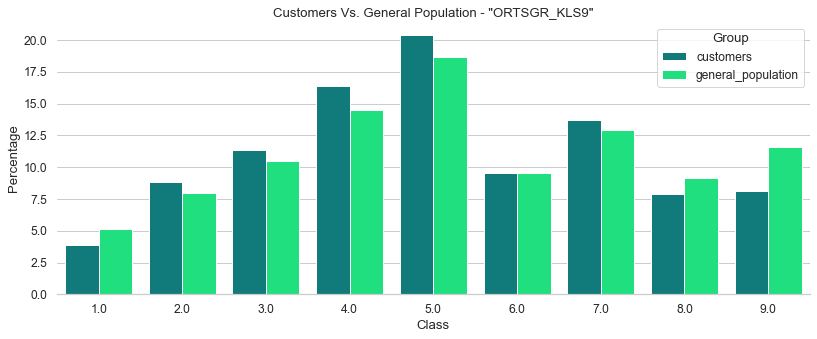

In [39]:
# Applying customers_against_general function to BALLRAUM column:
customers_against_general('ORTSGR_KLS9')

In [40]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
inhab_stats = stats_comparison('ORTSGR_KLS9')
inhab_stats

,Customers,General_Pop
count,141176.000000,793947.000000
mean,5.119517,5.293389
std,2.159184,2.303379
min,1.000000,1.000000
25%,4.000000,4.000000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,9.000000,9.000000


As an overall view, it would be possible to say that consumers are proportionally equally distributed in the different community sizes.

There's a slight tendency of overrepresentation in cities up to 50 thousand inhabitants and a tendency of underrepresentation in bigger cities with more than 700 thousand inhabitants, which corroborates with the previous `BALLRAUM` variable analysis.

<h4>Location Insights</h4>

* As a generalization, the proportion of the company's clients follows the same distribution as the proportion presented in the general population when considering people's location.

* There's a slight tendency of customers' overrepresentation in upper classes neighborhoods and small to medium cities (up to 50 thousand inhabitants).

* In the general population, almost 20% of the people live close to urban centers (class `1`). Among clients, this percentage decreases by almost 5%. It is corroborated when analyzing the proportion of clients in cities with more than 700 thousand inhabitants (underrepresentation). It makes sense considering the mail-order nature of the company.

#### 1.3.4 Consumer Classification<a name="cameo"></a>

So far, it was possible to identify the typical company's clients as elderly people living up to 50 km from urban centers. Now, the `CAMEO Classification` will be used in order to better understand customers' consumption and lifestyle habits and compare them to the general population's habits.

`CAMEO_INTL_2015` was divided in two variables: `CAMEO_INTL_FAM_STATUS` and `CAMEO_INTL_FAM_COMPOSITION`. The first one relates to 5 different classes:
* `1`: *wealthy*;
* `2`: *prosperous*;
* `3`: *comfortable*;
* `4`: *less afluent*;
* `5`: *poorer*.

`CAMEO_INTL_FAM_COMPOSITION` represents:
* `1`: *pre-family couples and singles*;
* `2`: *young couples with children*;
* `3`: *families with school age children*;
* `4`: *older families and mature couples*;
* `5`: *elders in retirement*.

"CAMEO_INTL_FAM_STATUS" VARIABLE INFO:
26.38% of the customers observations are related to NaN values.
11.15% of the general population observations are related to NaN values.



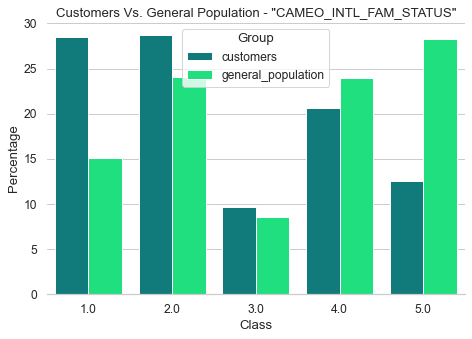

In [41]:
# Applying customers_against_general function to CAMEO_DEUG_2015 column:
customers_against_general('CAMEO_INTL_FAM_STATUS')

In [42]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
cameo_status_stats = stats_comparison('CAMEO_INTL_FAM_STATUS')
cameo_status_stats

,Customers,General_Pop
count,141098.000000,791869.000000
mean,2.598761,3.262098
std,1.404776,1.464494
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,4.000000
75%,4.000000,5.000000
max,5.000000,5.000000


`Wealthy` and `prosperous` classes are the most representative among clients. In, `wealthy` is the most overrepresented in comparison to the general population.

On the other hand, the `poorer` status appears as the most representative in the general population and the most underrepresented among clients.

"CAMEO_INTL_FAM_COMPOSITION" VARIABLE INFO:
26.38% of the customers observations are related to NaN values.
11.15% of the general population observations are related to NaN values.



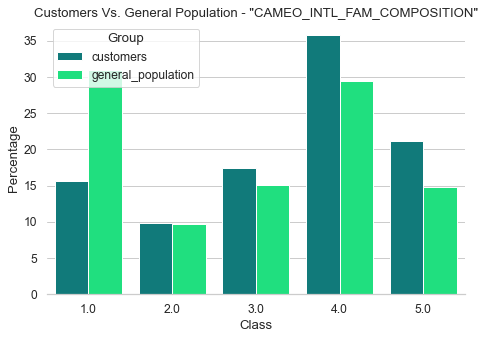

In [43]:
# Applying customers_against_general function to CAMEO_DEUG_2015 column:
customers_against_general('CAMEO_INTL_FAM_COMPOSITION')

In [44]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
cameo_comp_stats = stats_comparison('CAMEO_INTL_FAM_COMPOSITION')
cameo_comp_stats

,Customers,General_Pop
count,141098.000000,791869.000000
mean,3.368170,2.873033
std,1.340276,1.484771
min,1.000000,1.000000
25%,2.000000,1.000000
50%,4.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


More than the overrepresentation seen especially in the classes `4` and `5`, indicating that *older families*, *mature couples*, and *elders in retirement* are quite more common among clients than in the general population, what catches the attention is the underrepresentation in the class `1` related to *pre-families* and *singles*. 

It corroborates with one aspect seen before: that younger people are less likely to become clients in the company. Whether it's a matter of age, life situation, or any other possible condition would require deeper research.

`CAMEO_DEU_2015` relates to a similar content as the previous variable, also being a CAMEO Classification 2015, this time with a more detailed classification:
* `1A`: *Work-Life Balance*;
* `1B`: *Wealthy Best Ager*;
* `1C`: *Successful Songwriter*;
* `1D`: *Old Nobility*;
* `1E`: *City Nobility*;
* `2A`: *Cottage Chic*;
* `2B`: *Noble Jogger*;
* `2C`: *Established Gourmet*;
* `2D`: *Fine Management*;
* `3A`: *Career & Family*;
* `3B`: *Powershopping Families*;
* `3C`: *Rural Neighborhood*;
* `3D`: *Secure Retirement*;
* `4A`: *Family Starter*;
* `4B`: *Family Life*;
* `4C`: *String Trimmer*;
* `4D`: *Empty Nest*;
* `4E`: *Golden Ager*;
* `5A`: *Younger Employees*;
* `5B`: *Suddenly Family*;
* `5C`: *Family First*;
* `5D`: *Stock Market Junkies*;
* `5E`: *Coffee Rider*;
* `5F`: *Active Retirement*;
* `6A`: *Jobstarter*;
* `6B`: *Petty Bourgeois*;
* `6C`: *Long-Established*;
* `6D`: *Sportgardener*;
* `6E`: *Urban Parents*;
* `6F`: *Frugal Aging*;
* `7A`: *Journey Man*;
* `7B`: *Mantaplatte*;
* `7C`: *Factory Worker*;
* `7D`: *Rear Window*;
* `7E`: *Interested Retirees*;
* `8A`: *Multi-cultural*;
* `8B`: *Young & Mobile*;
* `8C`: *Prefab*;
* `8D`: *Town Seniors*;
* `9A`: *First Shared Apartment*;
* `9B`: *Temporary Workers*;
* `9C`: *Afternoon Talk Show*;
* `9D`: *Mini-Jobber*;
* `9E`: *Socking Away*.

"CAMEO_DEU_2015" VARIABLE INFO:
26.38% of the customers observations are related to NaN values.
11.15% of the general population observations are related to NaN values.



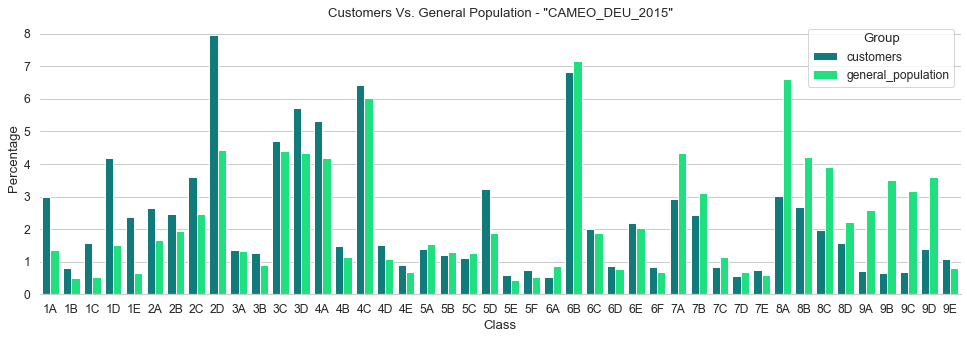

In [45]:
# Applying customers_against_general function to CAMEO_DEUG_2015 column:
customers_against_general('CAMEO_DEU_2015')

In [46]:
# Checking variable statistics for customers and general population:
cameo_deu_stats = stats_comparison('CAMEO_DEU_2015')
cameo_deu_stats

,Customers,General_Pop
count,141098,791869
unique,44,44
top,2D,6B
freq,11208,56672


Once again, there are indications that the distribution of customers along the different segments doesn't follow the general population distribution.

Among customers, the top classification is `Fine Management`, while among the general population, this position is taken by `Petty Bourgeois`.

Classes `1A` to `2D`, `3D`, `4A` and `5D` tend to be overrepresented in customers in comparison to the general population. The opposite happens in classes `7A`, and `8A` to `9D`. 

It reinforces that there are specific segments in the population that are especially attracted to the products offered by the company. Although there's no further explanation about these classes, we can deduce by their names that they relate not only to the social class but also to people's behavior and habits.

<h4>Consumer Classifications Insights</h4>

* *Upper social classes* tend to be more representative among the company's customers, following the opposite pattern of the general population.

* Some specific segments in the population are especially representative among customers, if not by their overall percentage, by their overrepresentation when comparing to the general population. Some examples: `Fine Management`, `Work-Life Balance`, `Successful Songwriter`, `Old Nobility`, `City Nobility`, and so on.

* Not only social class but also life habits and mindset may be related to the consumption of the organic products offered by the mail-order company.

#### 1.3.5 Income<a name="income"></a>

`HH_EINKOMMEN_SCORE` indicates the estimated household net income, corresponding to the following code:
* `1`: *highest income*;
* `2`: *very high income*;
* `3`: *high income*;
* `4`: *average income*;
* `5`: *lower income*;
* `6`: *very low income*.

"HH_EINKOMMEN_SCORE" VARIABLE INFO:
1.55% of the customers observations are related to NaN values.
2.06% of the general population observations are related to NaN values.



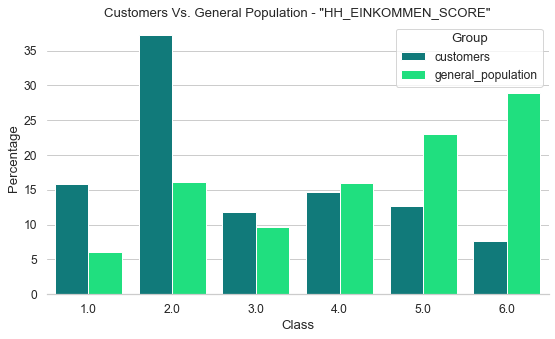

In [47]:
# Applying customers_against_general function to HH_EINKOMMEN_SCORE column:
customers_against_general('HH_EINKOMMEN_SCORE')

In [48]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
income_stats = stats_comparison('HH_EINKOMMEN_SCORE')
income_stats

,Customers,General_Pop
count,188684.000000,872873.000000
mean,2.942481,4.207243
std,1.533347,1.624057
min,1.000000,1.000000
25%,2.000000,3.000000
50%,2.000000,5.000000
75%,4.000000,6.000000
max,6.000000,6.000000


Clients classified with `highest income` and `very high income` represent more than 50% of the clients. Their proportion among customers shows values more than twice as high as the proportion shown in the general population. The top customer's class is the `2` (`very high income`), exceeding 35%, while in the general population it represents about 15% of the people.

Classes `3` and `4`, representing `high income` and `average income`, are practically equally represented both in the general population and among customers.

`Lower income` and especially `very low income` are underrepresented classes: while in the general population `very low income` represents almost 30% of the people, among clients its representation decreases to 7%.

Again, this can be seen as an opportunity. Once the majority of the population belongs to the lower classes when it comes to their incomes, if the company had the purpose to reach a broader audience, it could be considered releasing cheaper versions of the products. 

<h4>Income Insights</h4>

* The highest the income, the higher the propensity of buying the company's products. Clients with the highest incomes are proportionally the most representative, the opposite of what happens in the general population.

* Since the clients' profile represents the opposite of the population's distribution through the income aspect, it could also be seen as an opportunity. Cheaper versions of the products could be considered in order to reach the majority of the population that is represented by medium to low incomes.

#### 1.3.6 Habits and Other Curiosities<a name="habits"></a>

To better understand customers' profiles, `GFK_URLAUBERTYP` indicates people's vacation habits. These vacation habits are represented by the following codes:
* `1`: *event travelers*;
* `2`: *family-oriented vacationists*;
* `3`: *winter sportspeople*;
* `4`: *culture lovers*;
* `5`: *nature fans*;
* `6`: *hiker*;
* `7`: *golden ager*;
* `8`: *homeland-connected vacationists*;
* `9`: *package tour travelers*;
* `10`: *connoiseurs*;
* `11`: *active families*;
* `12`: *without vacation*.

"GFK_URLAUBERTYP" VARIABLE INFO:
1.68% of the customers observations are related to NaN values.
0.54% of the general population observations are related to NaN values.



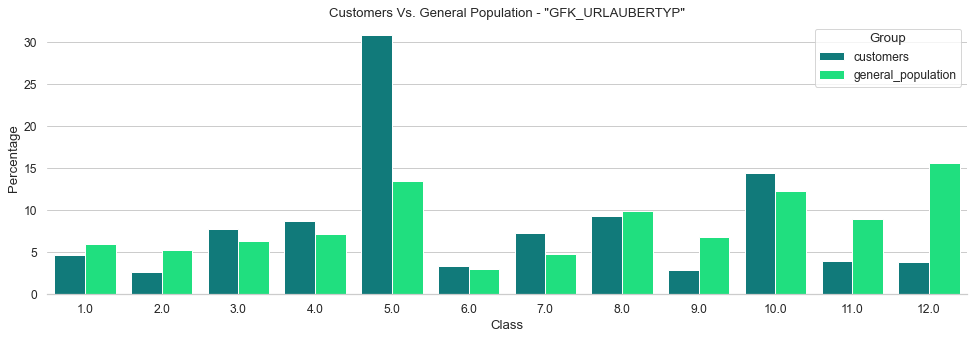

In [49]:
# Applying customers_against_general function to GFK_URLAUBERTYP column:
customers_against_general('GFK_URLAUBERTYP')

In [50]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
vacation_stats = stats_comparison('GFK_URLAUBERTYP')
vacation_stats

,Customers,General_Pop
count,188439.0,886367.0
unique,12.0,12.0
top,5.0,12.0
freq,58113.0,138545.0


It is possible to see some clear trends among customers that differ from the general population. There is a huge overrepresentation of `nature fans` as a vacation habit among customers. It may indicate that, not only in terms of vacation habits, the company's customers may have a mindset that values nature connection, which makes sense given that the company sells organic products. In a lower proportion, `golden agers` also seem to be overrepresented in the customers' group.

When looking for underrepresentation, at least 4 classes catch the attention: the ones `without vacation`, `active families` and `family-oriented vacationists`, and `package tour travelers`. All of these are more representative among the general population than among customers.

`LP_LEBENSPHASE_GROB` refines the last classification, including information about incomes:
* `1`: *single low-income, and average earners of younger age*;
* `2`: *single low-income, and average earners of higher age*;
* `3`: *single high-income earners*;
* `4`: *single low-income, and average earner-couples*;
* `5`: *single high-income, and earner-couples*;
* `6`: *single parents*;
* `7`: *single low-income, and average earner-families*;
* `8`: *high-income earner-families*;
* `9`: *average earners of younger age from mulitperson households*;
* `10`: *low-income, and average earners of higher age from mulitperson households*;
* `11`: *high-income earners of younger age from multiperson households*;
* `12`: *high-income earners of higher age from multiperson households*;

"LP_LEBENSPHASE_GROB" VARIABLE INFO:
26.58% of the customers observations are related to NaN values.
10.61% of the general population observations are related to NaN values.



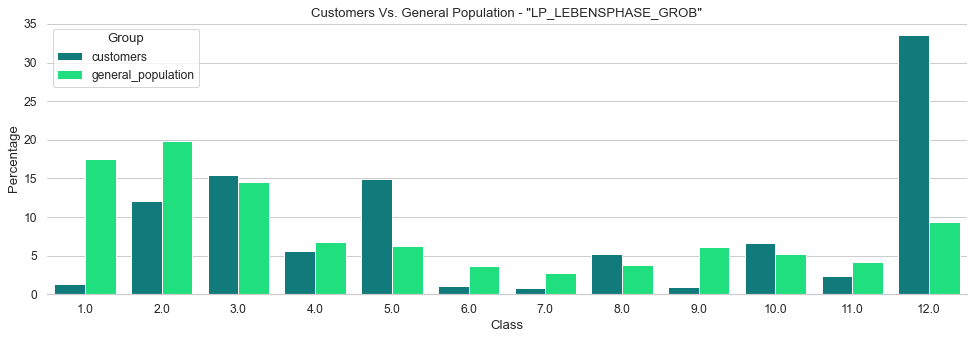

In [51]:
# Applying customers_against_general function to LP_LEBENSPHASE_GROB column:
customers_against_general('LP_LEBENSPHASE_GROB')

In [52]:
# Checking variable statistics for customers and general population (considering classes as numerical type):
lebensphase_stats = stats_comparison('LP_LEBENSPHASE_GROB')
lebensphase_stats

,Customers,General_Pop
count,140711.0,796649.0
unique,12.0,12.0
top,12.0,2.0
freq,47145.0,158139.0


Corroborating with the previous analysis on *age* and *incomes*, the top class for customers is the one representing *high-income earners of higher age*.

The other classes that stand out when comparing to the general population are also related to high incomes, independently from the family structure. The only exception is the class representing *low-income, and average earners of higher age*, related to low-income and average earners that seem to be overrepresented among customers, possibly because of the higher age factor.

As seen before, pre-families and singles are the ones with the highest underrepresentation among clients. This time, it's possible to see that the class `5`, representing *single high-income*, and *earner-couples* are overrepresented among clients. It could indicate that income is more important than age or family composition when it comes to becoming a client. 

On the other hand, while people classified as *single low-income* and *average earners of younger age* represent over 15% of the general population, among clients this percentage barely exceeds 1%.

`ZABEOTYP` indicates energy consumers types as:
* `1`: *green*;
* `2`: *smart*;
* `3`: *fair supplied*;
* `4`: *price driven*;
* `5`: *seeking orientation*;
* `6`: *indifferent*.

"ZABEOTYP" VARIABLE INFO:
0.00% of the customers observations are related to NaN values.
0.00% of the general population observations are related to NaN values.



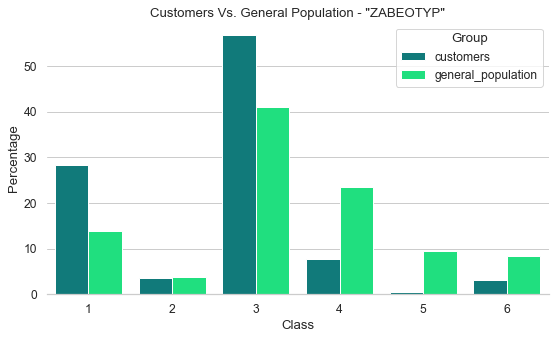

In [53]:
# Applying customers_against_general function to ZABEOTYP column:
customers_against_general('ZABEOTYP')

Among customers, it's possible to see an overrepresentation of energy consumers of the types `green` and `fair supplied`, indicating a tendency of a sense of responsibility with a conscious and sustainable energy consumption habit. 

<h4>Habits and Curiosities Insights</h4>

* People with travel habits classified as `golden agers` and especially `nature fans` are more representative among customers than among the general population, which indicates a good aspect for customer segmentation.

* On the other hand, the ones related to vacation habits classified as `without vacation`, `active families`, `family-oriented vacationists` and `package tour travelers` seem to be less likely to become costumers in the company.

* While simply looking at the family composition, it is possible to see that clients are more represented by `couples`, `two-generational` and `multi-generational householders`.

* When this familiar structure is analyzed together with an income perspective, we can see that more important than the family structure is the income related to the family.

* In comparison to the general population, in terms of energy consumption habits, customers seem to be less indifferent and more interested in sustainable energy solutions.

### 1.4 The Wise-Conscious Avant-Gardes<a name="report"></a>

If I had to reach out to the public that is more likely to join the company's customers group through a marketing campaign, I would focus on the `wisdom` related to the elders, but also on the `consciousness` of the impact that the consumption habits have on the planet. 

Given the fact that they may have a special connection with nature, the consumption of organic products can improve the individual's health and also the planet, and that is an aspect that can be explored when reaching out to customers.

It would also be important to highlight the `avant-garde` profile of these people, of those who think ahead of their time, indicating that the habit of consuming organic products is not just a lifestyle, but a legacy for future generations.

As a big picture, the regular customer of the mail-order company would be:
* mostly elderly people with different mindsets, but also younger people from upper classes related to higher incomes;

* the typical picture would be of *older families*, *mature couples* or *elders in retirement*, but also *pre-family couples* and *singles* if combined with a high-income situation;

* the majority of the clients are related to higher social classes that could be classified as *wealthy* and *prosperous*;

* there is a predominant mindset related to the *avant-garde* and *green avant-garde* movements, regardless of the specificities of the movement throughout the years;

* among elders, even *mainstreamers* are overrepresented in the clients' distribution.

### 1.5 Cluster Analysis<a name="cluster"></a>

Now, unsupervised machine learning techniques will be used in order to identify hidden patterns in the data, clustering the population into different groups, each one composed of people with similar characteristics.

With the defined clusters, it will be possible to perform a new comparison between customers and the general population. The difference is that, this time, the comparison won't be performed over one dimension (one variable), but over the different groups created through the effect that all the variables together have on these groups.

#### 1.5.1 Feature Engineering<a name="feateng2"></a>

First, there will be one more feature engineering process, this time over `CAMEO_DEU_2015` feature. Since there are 44 different classifications, they will be grouped according to the behavior presented when comparing customers and the general population, following this code:
* `0`: *underrepresented classes among clients*;
* `1`: *almost equally represented with slight underrepresentation tendency*;
* `2`: *almost equally represented with slight overrepresentation tendency*;
* `3`: *overrepresented classes among clients*.

In [54]:
# Defining CAMEO_DEU_2015 transformation:
def transform_cameo_deu(df):
    '''
    It simplifies CAMEO_DEU_2015 classes according to the representation pattern presented in the comparison
    between customers and the general population.
    '''
    # Creating new column:
    feat = 'CAMEO_DEU_2015'
    df['CAMEO_DEU_REPRESENTATION'] = [0 if df[feat].iloc[i] in ['6A', '7A', '7B', '7C', '8A', '8B', '8C', '8D', '9A', '9B', 
                                                                '9C', '9D'] \
                                      else 1 if df[feat].iloc[i] in ['5A', '5B', '5C', '6B', '7D'] \
                                      else 2 if df[feat].iloc[i] in ['3A', '3B', '3C', '4B', '4C', '4E', '5E', '5F', '6C', 
                                                                     '6D', '6E', '6F', '7E', '9E'] \
                                      else 3 if df[feat].iloc[i] in ['1A', '1B', '1C', '1D', '2A', '2B', '2C', '2D', '3D', 
                                                                     '4A', '5D'] \
                                      else np.nan for i in range(df.shape[0])]
    
    # Transforming the column to categorical type:
    df['CAMEO_DEU_REPRESENTATION'] = df['CAMEO_DEU_REPRESENTATION'].astype('category')
    
    # Deliting original column:
    df.drop(columns = [feat], inplace = True)
    
    return df

In [55]:
# Applying transform_cameo_deu on azdias dataframe:
azdias = transform_cameo_deu(azdias)

Since new features were created during the process, a complementary dictionary will be created to specify the new columns dtypes:

In [56]:
# Defining dtypes for new features:
new_feat_dtypes_dict = {'AVANT_GARDE': 'cat', 
                        'CAMEO_DEU_REPRESENTATION': 'num', 
                        'CAMEO_INTL_FAM_COMPOSITION': 'num', 
                        'CAMEO_INTL_FAM_STATUS': 'num', 
                        'YOUTH_DECADE': 'num'}

#### 1.5.2 NaN Values<a name="nan"></a>

The approach that will be used to fill in *nan* values is the following:
* `Numerical` and `ordinal` variables will have *nan* values replaced with the median of the existing values;

* `Categorical` variables will be binarized (One-Hot Encoding), and *nan* values will be indirectly considered.

In [57]:
# Defining function to replace nan values with the median or create dummy variables for following specific distribution:
def deal_with_nan_values(df, dict1 = dtypes_dict, dict2 = new_feat_dtypes_dict):
    '''
    It deals with nan values in two different ways:
    * if the feature is defined as 'num' (numerical), it fills nan values with the median value;
    * if the feature is defined as 'cat' (categorical) or 'bin' (binary), it creates dummy variables 
      and deletes the original column.
    
    Inputs:
    df: original dataframe;
    dict1: main dictionary mapping columns and dtypes;
    dict2: auxiliar dictionary mapping new columns and dtypes.
    
    Output:
    df: dataframe without nan values.
    '''
    # Selecting columns with nan values:
    nan_cols = list(df.columns[df.isnull().sum() != 0])
    
    # For each column, replace nan values:
    for col in nan_cols:
        
        # Verify in which dictionary the column is:
        if col in list(dict1.keys()):
            dict_ = dict1
        else:
            dict_ = dict2
            
        # Verify dtype, if numeric:
        if dict_[col] == 'num':
            # Fill in nan values with median:
            df[col].fillna(np.nanmedian(df[col]), inplace = True)
                
        else:
            # Delete original column and cocatenate dummy columns:
            df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], prefix = col, \
                                                                   prefix_sep = '_', dummy_na = False)], axis = 1)
    
    return df

#### 1.5.3 Standardizing Data<a name="standard"></a>

Even after the feature selection process, many columns were left to be analyzed. Because of that, Principal Component Analysis will be applied to the data.

In order to apply the `PCA` algorithm, the values need to be on the same scale. For that, one function will be defined to fit the model to the data, and another to use the fitted model to transform the data:

In [58]:
# Fitting StandardScaler model:
def fit_std_scaler(df):
    '''
    It uses the dataframe to fit the StandardScaler model.
    
    Input:
    df: dataframe used to fit the model.
    
    Output:
    cols: list of columns used in the fitting process;
    std_model: fitted StandardScaler model.
    '''
    # Instantiating scaler:
    std_scal = StandardScaler()
    
    # Columns used:
    cols = list(df.columns)
    
    # Fitting the model:
    std_scal.fit(df)
    
    return cols, std_scal

In [59]:
# Fitting StandardScaler model:
def transform_std_scaler(df, cols, scaler):
    '''
    It uses the fitted StandardScaler model to transform the data.
    
    Input:
    df: dataframe used to be transformed;
    cols: list of columns to assure dataframe compatibility.
    scaler: fitted StandardScaler model.
    
    Output:
    df: transformed dataframe.
    '''
    # Dataframe columns compatibility:
    for col in cols:
        if col not in df.columns:
            df[col] = 0
    
    # Scaling data:
    df = pd.DataFrame(scaler.transform(df), columns = df.columns)
    
    return df

Since there are different levels of information, according to the informational spreadsheet, the dimensionality reduction, in this case, the `PCA` technique, will not be applied to the whole dataset at once. Different components will be created for different levels of information.

Because of that, the dataset will be split according to their information level, and the transformations will be applied to these subsets.

In [463]:
# Creating dictionary to map each feature to its correspondent information level:
info_level = {'person': ['ANREDE_KZ', 'ALTERSKATEGORIE_GROB', 'AVANT_GARDE', 'CJT_GESAMTTYP', 'CJT_KATALOGNUTZER', 'CJT_TYP_6', 
                         'FINANZ_ANLEGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GFK_URLAUBERTYP', 'HEALTH_TYP', 'LP_FAMILIE_FEIN', 
                         'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 
                         'OST_WEST_KZ', 'RETOURTYP_BK_S', 'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SOHO_KZ', 
                         'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_RAT', 'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 
                         'SHOPPER_TYP', 'VERS_TYP', 'YOUTH_DECADE', 'ZABEOTYP'], 
              'household': ['AKT_DAT_KL', 'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'CAMEO_DEU_REPRESENTATION', 
                            'CAMEO_INTL_FAM_COMPOSITION', 'CAMEO_INTL_FAM_STATUS', 'D19_LETZTER_KAUF_BRANCHE', 
                            'HH_EINKOMMEN_SCORE', 'WOHNDAUER_2008', 'W_KEIT_KIND_HH', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 
                            'RT_UEBERGROESSE'], 
              'microcell': ['ANZ_HH_TITEL', 'DSL_FLAG', 'HH_DELTA_FLAG', 'KBA05_ALTER1', 'KBA05_ALTER2', 'KBA05_ALTER3', 
                            'KBA05_ALTER4', 'KBA05_ANHANG', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_CCM1', 
                            'KBA05_CCM2', 'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_HERST4', 
                            'KBA05_HERST5', 'KBA05_HERSTTEMP', 'KBA05_KRSAQUOT', 'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 
                            'KBA05_KRSHERST3', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ', 'KBA05_MAXHERST', 
                            'KBA05_MAXSEG', 'KBA05_MAXVORB', 'KBA05_MOD1', 'KBA05_MOD2', 'KBA05_MOD3', 'KBA05_MOD4', 
                            'KBA05_MODTEMP', 'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1', 'KBA05_SEG10', 'KBA05_SEG2', 
                            'KBA05_SEG3', 'KBA05_SEG4', 'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_SEG9', 
                            'KBA05_VORB0', 'KBA05_VORB1', 'KBA05_VORB2', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL3', 
                            'KBA05_ZUL4', 'KONSUMZELLE', 'MIN_GEBAEUDEJAHR', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG', 
                            'WOHNLAGE'], 
              'macrocell': ['BALLRAUM', 'GEBAEUDETYP_RASTER', 'GEBAEUDETYP', 'GEMEINDETYP', 'INNENSTADT', 'KBA13_AUDI', 
                            'KBA13_AUTOQUOTE', 'KBA13_BJ_2000', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009', 'KBA13_BMW', 
                            'KBA13_CCM_0_1400', 'KBA13_CCM_1000', 'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_1401_2500', 
                            'KBA13_CCM_1500', 'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000', 'KBA13_CCM_2500', 
                            'KBA13_CCM_2501', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FIAT', 
                            'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25', 'KBA13_HALTER_35', 'KBA13_HALTER_40', 
                            'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55', 'KBA13_HALTER_60', 'KBA13_HALTER_65', 
                            'KBA13_HALTER_66', 'KBA13_HERST_ASIEN', 'KBA13_HERST_EUROPA', 'KBA13_HERST_SONST', 'KBA13_KMH_140', 
                            'KBA13_KMH_180', 'KBA13_KMH_210', 'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT', 
                            'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ', 'KBA13_KRSHERST_FORD_OPEL', 
                            'KBA13_KRSSEG_KLEIN', 'KBA13_KRSSEG_OBER', 'KBA13_KRSZUL_NEU', 'KBA13_KW_110', 'KBA13_KW_120', 
                            'KBA13_KW_121', 'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60', 'KBA13_KW_61_120', 
                            'KBA13_KW_70', 'KBA13_KW_80', 'KBA13_KW_90', 'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 
                            'KBA13_NISSAN', 'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT', 'KBA13_SEG_GELAENDEWAGEN', 
                            'KBA13_SEG_KLEINWAGEN', 'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE', 
                            'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE', 'KBA13_SEG_SONSTIGE', 
                            'KBA13_SEG_SPORTWAGEN', 'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE', 
                            'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA', 'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 
                            'KBA13_VORB_2', 'KBA13_VORB_3', 'KBA13_VW', 'MOBI_REGIO', 'PLZ8_ANTG2', 'PLZ8_ANTG4', 
                            'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'VK_ZG11', 'VK_DHT4A', 'VHN', 'VHA', 'VERDICHTUNGSRAUM', 
                            'UNGLEICHENN_FLAG'], 
              'community': ['ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB']}

Next, all the transformations will be joined together in one function, and then it will be applied to the different levels of information.

In [61]:
# Defining function the apply nan and standard scaler transformations:
def transform_data(df, info_level, dic = info_level, cols = None, scaler = None):
    '''
    It applies the functions that treat nan values and standardize the values.
    
    Inputs:
    df: original dataframe;
    info_level: string indicating which information level will be treated;
    dic: dictionary indicating the information level of each feature.
    
    Output:
    df: transformed dataframe with the level of information columns.
    '''
    # Selecting information level columns:
    sel_cols = dic[info_level]
    df = df[sel_cols]
    
    # Applying deal_with_nan_values function:
    df = deal_with_nan_values(df)
    
    # If scaler is not defined, create scaler:
    if scaler == None:
        # Fitting StandardScaler model:
        cols, scaler = fit_std_scaler(df)
        
        # Standardizing data:
        df = transform_std_scaler(df, cols, scaler)
        
        return df, cols, scaler
    
    else:
        # Standardizing data:
        df = transform_std_scaler(df, cols, scaler)
        
        return df

In [62]:
# Applying data transformation on:
# 'person' info level:
azdias_pers, pers_cols, pers_scaler = transform_data(azdias, info_level = 'person')
azdias_pers.head()

,ANREDE_KZ,ALTERSKATEGORIE_GROB,CJT_KATALOGNUTZER,CJT_TYP_6,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZTYP,LP_FAMILIE_GROB,LP_STATUS_GROB,SEMIO_ERL,...,RETOURTYP_BK_S_4.0,RETOURTYP_BK_S_5.0,SOHO_KZ_0.0,SOHO_KZ_1.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_1.0,VERS_TYP_2.0
0,-1.045218,-0.751680,1.114571,1.155194,1.285741,-0.055511,0.105346,-0.102346,-0.972516,-0.819565,...,-0.415326,1.410938,-3.175946,-0.088255,-0.408743,-0.632675,-0.550832,-0.520916,-0.864739,-0.899772
1,0.956738,-1.743339,-1.569339,-1.862728,1.285741,1.422415,-1.403804,0.467806,-0.972516,-1.372799,...,-0.415326,-0.708749,-3.175946,11.330820,-0.408743,-0.632675,-0.550832,1.919697,-0.864739,1.111393
2,0.956738,0.239980,-0.898362,-1.108248,-0.675554,1.422415,-1.403804,-0.672497,-0.292539,0.840140,...,-0.415326,-0.708749,0.314867,-0.088255,-0.408743,-0.632675,1.815436,-0.520916,1.156419,-0.899772
3,0.956738,1.231640,-0.227384,-0.353767,-0.675554,-0.794475,1.111445,-1.242649,1.067415,1.393374,...,-0.415326,-0.708749,0.314867,-0.088255,-0.408743,1.580589,-0.550832,-0.520916,1.156419,-0.899772
4,-1.045218,0.239980,-0.227384,-0.353767,-1.329319,-0.794475,0.608395,1.608109,-0.292539,-0.266330,...,-0.415326,1.410938,0.314867,-0.088255,-0.408743,-0.632675,1.815436,-0.520916,-0.864739,1.111393


In [63]:
azdias_pers.shape

(891221, 127)

In [64]:
# 'household' info level:
azdias_hh, hh_cols, hh_scaler = transform_data(azdias, info_level = 'household')
azdias_hh.head()

,AKT_DAT_KL,ANZ_KINDER,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,CAMEO_DEU_REPRESENTATION,CAMEO_INTL_FAM_COMPOSITION,CAMEO_INTL_FAM_STATUS,HH_EINKOMMEN_SCORE,WOHNDAUER_2008,W_KEIT_KIND_HH,...,D19_LETZTER_KAUF_BRANCHE_D19_SONSTIGE,D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST
0,-0.371973,-0.292527,-0.302057,-0.057885,-0.250034,0.080573,0.468366,-1.380077,0.536436,-0.075268,...,-0.229852,-0.088988,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336
1,1.338692,-0.292527,0.357993,-0.057885,-1.112145,-1.347861,1.182728,1.102562,0.536436,-0.688662,...,-0.229852,-0.088988,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336
2,1.338692,-0.292527,-0.008701,-0.057885,0.612077,0.794789,-0.960358,-0.138757,0.536436,-0.688662,...,-0.229852,-0.088988,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336
3,-0.942195,-0.292527,-0.375395,-0.057885,1.474188,-0.633644,-1.674720,-2.000736,0.536436,-0.075268,...,-0.229852,-0.088988,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336
4,-0.942195,-0.292527,-0.302057,-0.057885,-0.250034,0.080573,0.468366,0.481902,0.536436,-1.302055,...,-0.229852,-0.088988,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336


In [65]:
azdias_hh.shape

(891221, 48)

In [66]:
# 'microcell' info level:
azdias_mic, mic_cols, mic_scaler = transform_data(azdias, info_level = 'microcell')
azdias_mic.head()

,ANZ_HH_TITEL,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_CCM1,...,STRUKTURTYP_1.0,STRUKTURTYP_2.0,STRUKTURTYP_3.0,WOHNLAGE_1.0,WOHNLAGE_2.0,WOHNLAGE_3.0,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0
0,-0.118316,0.050982,-0.028310,0.004212,0.147675,0.039277,-0.196024,-0.552796,-0.434299,0.030080,...,-0.408790,-0.376459,-1.286986,-0.227668,-0.356262,-0.623917,-0.424308,-0.301683,-0.484297,-0.141413
1,-0.118316,0.969796,1.000418,-2.034268,1.026638,-1.119170,-1.063952,-0.552796,2.904396,-2.014398,...,-0.408790,2.656330,-1.286986,-0.227668,-0.356262,-0.623917,2.356777,-0.301683,-0.484297,-0.141413
2,-0.118316,0.050982,-0.028310,0.004212,0.147675,-1.119170,1.539832,0.488058,-0.434299,2.074558,...,-0.408790,-0.376459,0.777009,-0.227668,2.806925,-0.623917,-0.424308,-0.301683,-0.484297,-0.141413
3,-0.118316,0.050982,2.029147,0.004212,-2.489212,0.039277,-0.196024,-0.552796,-0.434299,-0.992159,...,2.446244,-0.376459,-1.286986,-0.227668,-0.356262,-0.623917,-0.424308,-0.301683,2.064847,-0.141413
4,-0.118316,-1.786646,1.000418,1.023452,0.147675,-1.119170,2.407760,0.488058,-0.434299,1.052319,...,-0.408790,-0.376459,0.777009,-0.227668,-0.356262,1.602777,-0.424308,-0.301683,-0.484297,-0.141413


In [67]:
azdias_mic.shape

(891221, 84)

In [68]:
# 'macrocell' info level:
azdias_mac, mac_cols, mac_scaler = transform_data(azdias, info_level = 'macrocell')
azdias_mac.head()

,BALLRAUM,GEBAEUDETYP_RASTER,INNENSTADT,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_2000,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,...,GEMEINDETYP_30.0,GEMEINDETYP_40.0,GEMEINDETYP_50.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,UNGLEICHENN_FLAG_0.0,UNGLEICHENN_FLAG_1.0
0,0.364020,0.267123,0.209499,-0.005091,0.194343,0.008549,0.016347,0.361658,0.351061,-0.149129,...,-0.399016,-0.404976,-0.246437,-1.129351,-0.292877,-0.245683,-0.26062,-0.350147,-2.248686,-0.30014
1,0.844338,-0.872772,1.768571,1.056314,-0.818354,0.008549,0.016347,0.361658,-0.377974,-0.149129,...,-0.399016,-0.404976,-0.246437,0.885465,-0.292877,-0.245683,-0.26062,-0.350147,-2.248686,3.33178
2,-1.076934,0.267123,-0.310191,-0.005091,0.194343,-1.059790,2.224596,0.361658,-1.107010,0.913649,...,-0.399016,-0.404976,-0.246437,0.885465,-0.292877,-0.245683,-0.26062,-0.350147,0.444704,-0.30014
3,-0.116298,0.267123,0.729190,2.117719,0.194343,-1.059790,0.016347,1.081646,0.351061,0.913649,...,-0.399016,2.469281,-0.246437,0.885465,-0.292877,-0.245683,-0.26062,-0.350147,0.444704,-0.30014
4,-1.076934,1.407019,-1.869263,1.056314,0.194343,0.008549,-1.087777,-1.798307,1.809131,-1.211907,...,-0.399016,-0.404976,-0.246437,-1.129351,3.414400,-0.245683,-0.26062,-0.350147,0.444704,-0.30014


In [69]:
azdias_mac.shape

(891221, 121)

In [70]:
# 'community' info level:
azdias_com, com_cols, com_scaler = transform_data(azdias, info_level = 'community')
azdias_com.head()

,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-0.157224,-0.120115,-0.049267
1,-0.157224,-0.120115,0.729399
2,-0.157224,-0.120115,-0.827934
3,-1.216157,-1.039247,-0.049267
4,0.901709,0.339451,1.508065


In [71]:
azdias_com.shape

(891221, 3)

In [72]:
print('Information Level Summary:')
print('--------------------------')
print('Personal level has {} features.'.format(azdias_pers.shape[1]))
print('Household level has {} features.'.format(azdias_hh.shape[1]))
print('Microcell level has {} features.'.format(azdias_mic.shape[1]))
print('Macrocell level has {} features.'.format(azdias_mac.shape[1]))
print('Community level has {} features.'.format(azdias_com.shape[1]))

Information Level Summary:
--------------------------
Personal level has 127 features.
Household level has 48 features.
Microcell level has 84 features.
Macrocell level has 121 features.
Community level has 3 features.


Considering the number of features after the transformations, `PCA` will be applied only on the first four levels of information:
* Personal;
* Household;
* Microcell;
* Macrocell.

The Community level has only three features, and because of that, they will be kept without further transformations.

#### 1.5.4 Dimensionality Reduction<a name="pca"></a>

Once the data is treated and standardized, before actually applying the dimensionality reduction, `PCA` will be applied with standard parameters in order to decide the number of components to keep.

To make the number of components decision, a *scree plot* will be created for each level of information data.

In [73]:
# Defining function to create scree plot to decide how many components to keep:
def create_scree_plot(pca):
    '''
    It creates a scree plot for the fitted principal component analysis in order to define the number
    of components to keep.
    
    Input: 
    pca: principal component analysis object fitted to data.
    '''
    # Getting the variance's percentage explained by each component:
    perc_vars = pca.explained_variance_ratio_
    
    # Getting cumulative values of the variance's percentage:
    cum_perc_vars = np.cumsum(perc_vars)
    
    # Defining the number of components:
    n_comp = len(pca.explained_variance_ratio_)
    
    # Defining the index for each component:
    index = np.arange(n_comp)
    
    # Creating scree plot:
    sns.set_theme(style = "whitegrid", font_scale = 1.1)
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
    
    # Drawing lineplot:
    sns.lineplot(x = index, y = cum_perc_vars, 
                 markers = True, color = 'black').set(xlabel = 'Number of Principal Components', 
                                                      ylabel = 'Explained Variance', 
                                                      title = "Scree Plot - Cumulative Explained Variance", 
                                                      ylim = (0,1.02))
    sns.despine()
    fig.show()

The purpose is to retain most of the data variability, and the few components as possible, simplifying the resulted data.

Since it's a client segmentation problem, the assumption is that the `person` information level must be more important than the `household` information level, which is more important than the `microcell` and the `macrocell` information levels, being the last one the more general in this scale.

Because of that, when deciding the number of components to keep, more important levels will have the number of components necessary to explain about 60% of the variance, while less important levels will be allowed to have a lower explained variance rate.

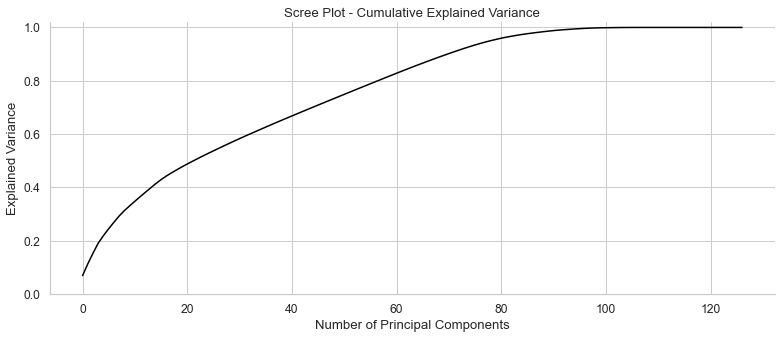

In [74]:
# PERSON level:
pca = PCA()
pers_pca = pca.fit(azdias_pers)

# Getting the scree plot:
create_scree_plot(pers_pca)

In order to keep about 60% of the explained variance, in the `person` level **30 components** will be kept.

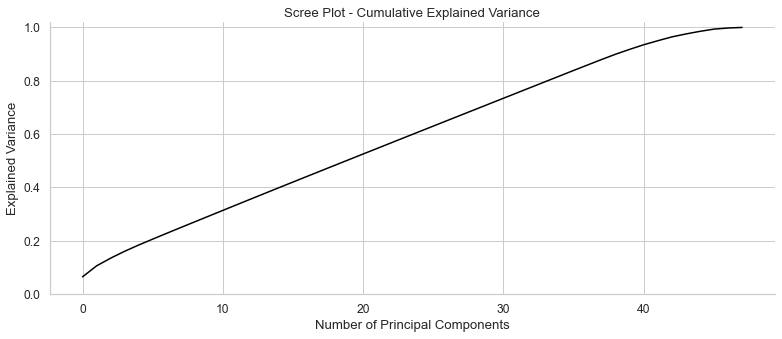

In [75]:
# HOUSEHOLD level:
hh_pca = pca.fit(azdias_hh)

# Getting the scree plot:
create_scree_plot(hh_pca)

In the `household` level, **20 components** explain over 50% of the data variance.

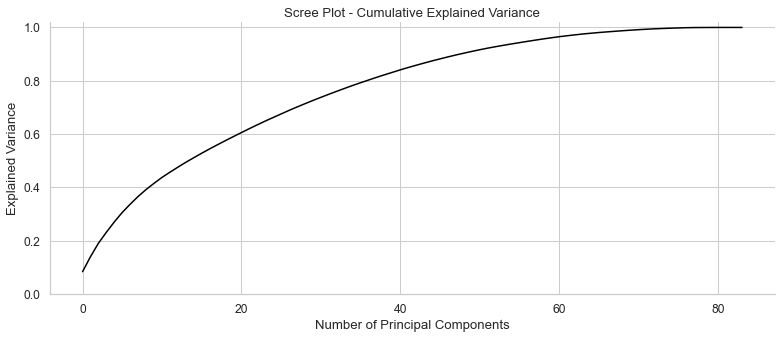

In [76]:
# MICROCELL level:
mic_pca = pca.fit(azdias_mic)

# Getting the scree plot:
create_scree_plot(mic_pca)

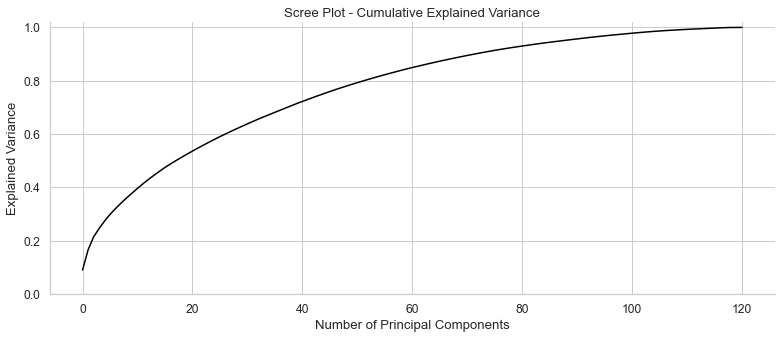

In [77]:
# MACROCELL level:
mac_pca = pca.fit(azdias_mac)

# Getting the scree plot:
create_scree_plot(mac_pca)

Because of the scale of importance assumed before, `microcell` and `macrocell` levels will be allowed to have their rate of explained variance between 40 and 50%, keeping **10 components** for each one of them.

<h4>Applying PCA</h4>

In [78]:
#____________________________________________________________
# PERSON:

# Instantiating pca object:
pca_pers = PCA(n_components = 30, random_state = 101)

# Fitting pca and applyting transformation on azdias dataset:
azdias_pers_pca = pca_pers.fit_transform(azdias_pers)

#____________________________________________________________
# HOUSEHOLD:

# Instantiating pca object:
pca_hh = PCA(n_components = 20, random_state = 201)

# Fitting pca and applyting transformation on azdias dataset:
azdias_hh_pca = pca_hh.fit_transform(azdias_hh)

#____________________________________________________________
# MICROCELL:

# Instantiating pca object:
pca_mic = PCA(n_components = 10, random_state = 301)

# Fitting pca and applyting transformation on azdias dataset:
azdias_mic_pca = pca_mic.fit_transform(azdias_mic)

#____________________________________________________________
# MACROCELL:

# Instantiating pca object:
pca_mac = PCA(n_components = 10, random_state = 401)

# Fitting pca and applyting transformation on azdias dataset:
azdias_mac_pca = pca_mac.fit_transform(azdias_mac)

In [79]:
# Column names for general dataframe:
person_cols = ['pers01', 'pers02', 'pers03', 'pers04', 'pers05', 'pers06', 'pers07', 'pers08', 'pers09', 'pers10', 'pers11', 
               'pers12', 'pers13', 'pers14', 'pers15', 'pers16', 'pers17', 'pers18', 'pers19', 'pers20', 'pers21', 'pers22', 
               'pers23', 'pers24', 'pers25', 'pers26', 'pers27', 'pers28', 'pers29', 'pers30']

household_cols = ['hh01', 'hh02', 'hh03', 'hh04', 'hh05', 'hh06', 'hh07', 'hh08', 'hh09', 'hh10', 'hh11', 'hh12', 'hh13', 
                  'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20']

microcell_cols = ['mic01', 'mic02', 'mic03', 'mic04', 'mic05', 'mic06', 'mic07', 'mic08', 'mic09', 'mic10']

macrocell_cols = ['mac01', 'mac02', 'mac03', 'mac04', 'mac05', 'mac06', 'mac07', 'mac08', 'mac09', 'mac10']

# Concatenating pca dataframes together, also including the 3 features related to the community information level:
gen_azdias = pd.concat([pd.DataFrame(azdias_pers_pca, columns = person_cols), 
                        pd.DataFrame(azdias_hh_pca, columns = household_cols), 
                        pd.DataFrame(azdias_mic_pca, columns = microcell_cols), 
                        pd.DataFrame(azdias_mac_pca, columns = macrocell_cols), 
                        azdias_com], \
                       axis = 1)

gen_azdias.head()

,pers01,pers02,pers03,pers04,pers05,pers06,pers07,pers08,pers09,pers10,...,mac04,mac05,mac06,mac07,mac08,mac09,mac10,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,0.421077,-2.436743,0.558806,3.877761,2.332472,4.168596,0.337304,-1.254146,-0.875836,0.219334,...,-0.692210,-0.861111,-0.251886,0.069732,-0.289423,-0.265242,-0.931883,-0.157224,-0.120115,-0.049267
1,-4.423487,-1.673512,3.137920,-2.101154,0.399192,2.170958,-3.354693,7.424744,-0.783785,2.323694,...,1.383740,-1.039849,-0.398814,0.138978,-1.816378,-2.473485,1.287036,-0.157224,-0.120115,0.729399
2,-0.700554,-1.490853,0.640842,-2.253934,-1.902781,-0.463314,-1.008646,-1.735121,-0.069387,0.619819,...,0.567493,1.826936,-0.506419,-1.316527,3.447721,-1.093419,0.303298,-0.157224,-0.120115,-0.827934
3,2.187319,-0.135553,1.162063,-0.696049,-1.254384,0.157207,-0.413595,-0.388225,1.196222,-0.882777,...,-2.262630,-1.992616,0.271089,1.945836,-0.416559,0.674640,-1.466854,-1.216157,-1.039247,-0.049267
4,1.194651,2.545270,-0.416842,-0.389970,3.919045,-1.492484,1.052284,1.140475,-2.300297,-2.382644,...,-4.483280,-2.842522,-2.083610,-0.471372,-0.667284,-1.058439,-1.276846,0.901709,0.339451,1.508065


To better understand how the original features compose these components created through `PCA`, a function will be defined to return the most important features for each component:

In [80]:
# Defining function to show most important features for each component:
def analyze_component(component, top = 3):
    '''
    It returns the most important features related to the component.
    
    Inputs:
    component: integer indicating the number of the component to be analyzed;
    top: integer indicating the number of top features to return;
    '''
    # Checking on to which level of informations the component relates to:
    # PERSON component:
    if component in range(30):
        print('\nPERSON Component:')
        print('-----------------')
        pca = pca_pers
        features = list(azdias_pers.columns)
    
    # HOUSEHOLD component:
    elif component in range(30, 50):
        print('\nHOUSEHOLD Component:')
        print('--------------------')
        pca = pca_hh
        features = list(azdias_hh.columns)
        component = component - 30
    
    # MICROCELL component:   
    elif component in range(50, 60):
        print('\nMICROCELL Component:')
        print('--------------------')
        pca = pca_mic
        features = list(azdias_mic.columns)
        component = component - 50
    
    # MACROCELL component:
    elif component in range(60, 70):
        print('\nMACROCELL Component:')
        print('--------------------')
        pca = pca_mac
        features = list(azdias_mac.columns)
        component = component - 60
        
    else:
        return(print('Component out of range (0-69)'))
        
    
    # Extracting features' weight on the desired component:
    weights = list(pca.components_[component])
    
    # Getting the index of ordered weights:
    ordered_idx = np.argsort(weights)[::-1]
    
    # Getting top indexes:
    top_pos_idx = ordered_idx[:top]
    top_neg_idx = ordered_idx[-top:]
    
    # Printing top positive weights on the component:
    print('\nComponent {}'.format(component))
    print('------------')
    print('\n* Top {} Positive Weights:'.format(top))
    print('--------------------------')
    for i in top_pos_idx:
        print('{}: {:.3f}'.format(features[i], weights[i]))
    
    # Printing top negative weights on the component:
    print('\n* Top {} Negative Weights:'.format(top))
    print('--------------------------')
    for j in top_neg_idx[::-1]:
        print('{}: {:.3f}'.format(features[j], weights[j]))

In [81]:
# Testing analyze_component:
analyze_component(0, top = 5)


PERSON Component:
-----------------

Component 0
------------

* Top 5 Positive Weights:
--------------------------
ALTERSKATEGORIE_GROB: 0.286
CJT_TYP_6: 0.216
SEMIO_ERL: 0.215
SEMIO_LUST: 0.202
RETOURTYP_BK_S_5.0: 0.162

* Top 5 Negative Weights:
--------------------------
YOUTH_DECADE: -0.278
SEMIO_TRADV: -0.250
SEMIO_REL: -0.248
SEMIO_RAT: -0.219
FINANZ_ANLEGER: -0.217


Unfortunately, there was no explanation provided for the feature `CJT_TYP_6` (it's only known to be related to *customer journey typology*). However, as an example, the **Component 0** related to the **person** information level will be interpreted without this specific feature.

`ALTERSKATEGORIE_GROB` relates to age classification through prename analysis, where higher values represent higher ages, indicating that these components represent elder people. This aspect can be reinforced when analyzing the highest negative weight related to the `YOUTH_DECADE` component.

`YOUTH_DECADE` indicates in which decade the person lived his/her youth period. In other words, the lower the decade, the elder the person is. Basically, these two variables represent the same information, but their values are in opposite directions, confirming that this component represents elder people.

It can also be seen that `SEMIO_ERL` and `SEMIO_LUST` are important features that positively represent this component. `SEMIO_ERL` describes if the person is eventful oriented while `SEMIO_LUST`indicates if the person is sensual minded. Higher values indicate lower affinity with that specific characteristic (*1 - highest affinity*, *7 - lowest affinity*). It tells that this component represents elder people that are *not* eventful oriented, nor sensual minded.

On the oher hand, `SEMIO_TRADV` and `SEMIO_REL` represent important aspects in the opposite direction, indicating that the component represents people that are traditional-minded and religious. At the same time, they have a rational mind (`SEMIO_RAT`).

`RETOURTYP_BK_S_5.0` indicates that the return type of these people is classified as *determined minimal-returner*, and the `FINANZ_ALENGER` indicates a high correlation to the *investor* financial typology, maybe giving a hint that these people may also be associated with higher incomes.

#### 1.5.5 Defining the Number of Clusters<a name="nclusters"></a>

Before classifying the data in different clusters, it's necessary to find the optimal number of clusters. For that, the *Elbow Method* will be used:

In [82]:
# Defining function to create Elbow Method Visualization
def apply_elbow_method(df = gen_azdias):
    '''
    It returns a visualization that shows the sum of squared distances of samples to their closest cluster
    center for each attempt of number of clusters.
    
    Input:
    df: dataframe on which cluster analysis will be performed.
    '''
    # Defining number of clusters attempts:
    n_cluster = range(2, 32, 2)
    
    # Creating inertia list:
    wcss = list()
    
    # Perform K-Means for each attempt and extract its 'inertia' (sum of quared distances to their closest cluster):
    for n in n_cluster:
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        
    # Creating the visualization:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
    
    # Drawing lineplot:
    sns.lineplot(x = n_cluster, y = wcss, 
                 markers = True, color = 'black').set(xlabel = 'Number of Clusters', 
                                                      ylabel = 'Sum of Squared Distances', 
                                                      title = "Elbow Method - Optimizing Number of Clusters Choice")
    sns.despine()
    fig.show()

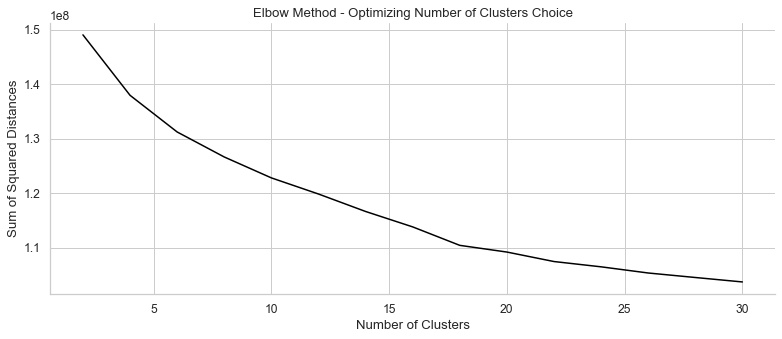

In [83]:
# Checking Elbow visualization:
apply_elbow_method()

Unfortunately, there's no clear elbow indicating which would be the best number of clusters to be chosen. However, it's possible to see that the most expressive change in the inclination happens between 15 and 20 clusters.

With that, the clustering process will be built considering **18 clusters**.

#### 1.5.6 Applying Transformations on Customer Data<a name="transcustomer"></a>

Before proceeding to the clustering process, data transformation will be applied to the customers data:

In [84]:
# CAMEO_DEU feature engineering:
customers = transform_cameo_deu(customers)

In [85]:
# Applying data transformation on:
# 'person' info level:
customers_pers = transform_data(customers, info_level = 'person', cols = pers_cols, scaler = pers_scaler)

In [86]:
# 'household' info level:
customers_hh = transform_data(customers, info_level = 'household', cols = hh_cols, scaler = hh_scaler)

In [87]:
# 'microcell' info level:
customers_mic = transform_data(customers, info_level = 'microcell', cols = mic_cols, scaler = mic_scaler)

In [88]:
# 'macrocell' info level:
customers_mac = transform_data(customers, info_level = 'macrocell', cols = mac_cols, scaler = mac_scaler)

In [89]:
# 'community' info level:
customers_com = transform_data(customers, info_level = 'community', cols = com_cols, scaler = com_scaler)

In [90]:
# PCA transformation:

#_______________________________________________________
# PERSON:

# Applyting transformation on customers dataset:
customers_pers_pca = pca_pers.transform(customers_pers)

#_______________________________________________________
# HOUSEHOLD:

# Applyting transformation on customers dataset:
customers_hh_pca = pca_hh.transform(customers_hh)

#_______________________________________________________
# MICROCELL:

# Applyting transformation on customers dataset:
customers_mic_pca = pca_mic.transform(customers_mic)

#_______________________________________________________
# MACROCELL:

# Applyting transformation on customers dataset:
customers_mac_pca = pca_mac.transform(customers_mac)

In [91]:
# Concatenating pca dataframes together, also including the 3 features related to the community information level:
gen_customers = pd.concat([pd.DataFrame(customers_pers_pca, columns = person_cols), 
                           pd.DataFrame(customers_hh_pca, columns = household_cols), 
                           pd.DataFrame(customers_mic_pca, columns = microcell_cols), 
                           pd.DataFrame(customers_mac_pca, columns = macrocell_cols), 
                           customers_com], \
                          axis = 1)

gen_customers.head()

,pers01,pers02,pers03,pers04,pers05,pers06,pers07,pers08,pers09,pers10,...,mac04,mac05,mac06,mac07,mac08,mac09,mac10,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,4.149373,3.573212,-1.063057,2.144598,-0.877834,4.183095,-1.334527,-1.426116,1.246668,2.246471,...,0.667557,-0.538375,0.706268,-0.333297,-1.911558,-0.504453,-2.002821,-2.275090,-1.498812,-1.606600
1,2.228706,1.382445,-1.110189,1.957187,0.249996,0.109119,-0.051683,0.563802,2.144638,0.042124,...,-0.286095,-0.987097,0.175793,0.352860,0.409929,-0.181157,-0.538670,-0.157224,-0.120115,-0.049267
2,5.705218,-0.468537,0.266898,-0.326731,-3.093522,-1.277131,-1.309439,-0.781174,-0.140705,2.542760,...,-4.387650,-1.102048,0.409549,1.489068,-0.443459,-1.875650,2.239603,-0.157224,-0.120115,-0.049267
3,2.368900,1.375798,-1.687720,2.737147,-0.157840,0.219595,-0.119352,0.682820,1.684454,-0.059407,...,0.329346,-3.111259,0.511858,-0.954334,3.469172,0.034924,1.075724,-2.275090,-1.039247,-1.606600
4,-0.331720,1.964049,0.400708,0.085166,3.595037,-1.266436,1.160691,0.859366,-1.158188,-2.597906,...,-2.313336,1.427014,1.269482,-0.363614,1.796189,0.934850,-0.258103,-0.157224,-0.120115,-1.606600


#### 1.5.7 Clustering<a name="clustering"></a>

In [107]:
# Training KMeans algorithm and making cluster predictions:
# Instatiating KMeans algorithm for n clusters:
kmeans = KMeans(n_clusters = 18, random_state = 101)
    
# Fitting to df1 data:
kmeans.fit(gen_azdias)
    
# Predicting clusters on df1:
azdias_clusters = kmeans.predict(gen_azdias)
    
# Predicting clusters on df2:
customers_clusters = kmeans.predict(gen_customers)

#### 1.5.8 Evaluating Clusters<a name="clustereval"></a>

Once each observation was assigned to its correspondent cluster, the job now is to check which clusters are proportionally more representative among clients than in the general population. The same for the clusters that happen more frequently in the general population in comparison to the customers' group.

With that, it will be possible to understand the different combinations of features that result in a person being more likely to become a client or the other way around.

In [108]:
# Defining a function to create a comparison barplot:
def compare_cluster_occurance(customers = customers_clusters, general = azdias_clusters):
    '''
    It creates a bor plot comparing the percentages related to each one the clusters borh for customers and
    the general population.
    
    Inputs:
    customers: array containing the assigned cluster for each customer observation;
    general: rray containing the assigned cluster for each general population observation.
    '''
    # Counting cluster occurences in customer population:
    customer_cluster_occ = np.bincount(customers)
    
    # Counting cluster occurences in general population:
    gen_pop_cluster_occ = np.bincount(general)
    
    # Creating dataframe with cluster proportional counting:
    cluster_df = pd.DataFrame(columns = ['general_population', 'customers'])
    n_pop = np.sum(gen_pop_cluster_occ)
    n_cust = np.sum(customer_cluster_occ)
    cluster_df.general_population = [(count / n_pop) * 100 for count in gen_pop_cluster_occ]
    cluster_df.customers = [(count / n_cust) * 100 for count in customer_cluster_occ]
    cluster_df['Cluster'] = cluster_df.index.values
    
    # Transforming df to melted version:
    melted_df = pd.melt(cluster_df, id_vars = ['Cluster'] , value_vars = ['general_population', 'customers'], \
                        var_name = 'Group', value_name ='Percentage')
    
    palette = {'customers': 'darkcyan', 'general_population': 'springgreen'}
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16.5, 5))
    sns.barplot(x = 'Cluster', y = 'Percentage', hue = 'Group', data = melted_df, palette = palette, ax = ax).set(
        title = 'Comparison Between Customers and General Population - Clusters')
    sns.despine(left=True, top = True)
    fig.show()
    
    # Computing percentage differences:
    perc_diff = [((cluster_df.customers[i] - cluster_df.general_population[i]) / cluster_df.general_population[i]) * 100 \
                 for i in range(cluster_df.shape[0])]
    # Getting ordered index: 
    ordered_idx = np.argsort(perc_diff)[::-1]
    
    # Printing top 5 customers' clusters with highest representativity in comparison to general population:
    print('Top 5 Overrepresented Clusters among Customers:')
    print('-----------------------------------------------\n')
    for i in ordered_idx[:5]:
        print('Cluster {}: increased {:.1f} %'.format(i, perc_diff[i]))
        
    # Printing top 5 customers' clusters with lowest representativity in comparison to general population:
    print('\nTop 5 Underrepresented Clusters among Customers:')
    print('-----------------------------------------------\n')
    for i in ordered_idx[-5:][::-1]:
        print('Cluster {}: decreased {:.1f} %'.format(i, perc_diff[i]))

Top 5 Overrepresented Clusters among Customers:
-----------------------------------------------

Cluster 2: increased 205.8 %
Cluster 9: increased 205.0 %
Cluster 4: increased 109.4 %
Cluster 5: increased 67.0 %
Cluster 12: increased 50.3 %

Top 5 Underrepresented Clusters among Customers:
-----------------------------------------------

Cluster 0: decreased -95.1 %
Cluster 16: decreased -88.1 %
Cluster 14: decreased -83.1 %
Cluster 10: decreased -77.4 %
Cluster 11: decreased -75.7 %


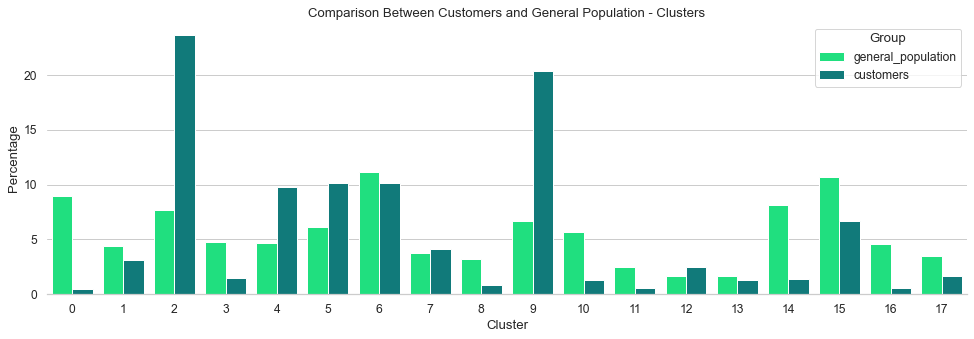

In [109]:
compare_cluster_occurance()

To better understand what these clusters represent, `cluster center` will provide the most important components related to that specific cluster, and then it will be possible to go back to those specific components to understand the features that better represent them.

That way, it will be possible to develop a cluster overview.

In [110]:
# Creating a function that, given one specific cluster, returns the most important features associated with it:
def cluster_most_important_features(cluster, kmeans = kmeans, top_comp = 3):
    '''
    Given a cluster, it searches for the most important components, and through them, search for 
    the most important features related to those components.
    
    Input:
    cluster: integer indicating the target cluster (0-17);
    kmeans: trained kmeans model
    top_com: number of most important components to be analyzed.
    '''
    # Getting cluster center:
    cluster_centers = kmeans.cluster_centers_[cluster]
    
    # Getting more important components:
    pos_idx = np.argsort(cluster_centers)[::-1]
    pos_idx = pos_idx[:top_comp]
    
    # Analyzing components and extracting their most important features:
    print('Principal Components with Highest Impact on Cluster {}:'.format(cluster))
    print('--------------------------------------------------------')
    for comp in pos_idx:
        analyze_component(comp)

#### 1.5.8.1 Overrepresented Clusters<a name="over"></a>

**Cluster 2 - GREEN DREAMERS**

In [117]:
# Analyzing Cluster 2:
cluster_most_important_features(2, top_comp = 3)

Principal Components with Highest Impact on Cluster 2:
--------------------------------------------------------

PERSON Component:
-----------------

Component 3
------------

* Top 3 Positive Weights:
--------------------------
LP_FAMILIE_FEIN_0.0: 0.284
GFK_URLAUBERTYP_5.0: 0.236
SEMIO_FAM: 0.235

* Top 3 Negative Weights:
--------------------------
SOHO_KZ_0.0: -0.326
AVANT_GARDE_0.0: -0.249
NATIONALITAET_KZ_1.0: -0.212

PERSON Component:
-----------------

Component 2
------------

* Top 3 Positive Weights:
--------------------------
ANREDE_KZ: 0.272
LP_FAMILIE_GROB: 0.221
SEMIO_KRIT: 0.211

* Top 3 Negative Weights:
--------------------------
LP_FAMILIE_FEIN_1.0: -0.266
SEMIO_VERT: -0.261
SEMIO_SOZ: -0.242

MICROCELL Component:
--------------------

Component 2
------------

* Top 3 Positive Weights:
--------------------------
KBA05_HERSTTEMP_5.0: 0.291
KBA05_MODTEMP_5.0: 0.291
MIN_GEBAEUDEJAHR: 0.283

* Top 3 Negative Weights:
--------------------------
STRUKTURTYP_3.0: -0.236
DS

`CLUSTER 2` is the one with the highest overrepresentation, being proportionally over 205% more representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* their vacation habits can be classified as *nature fans*, already emphasizing the green tendency as an important aspect present in people represented by this cluster;

* the green aspect is reinforced with the *avant-garde* aspect, relating this cluster to people with the avant-garde mindset, which also relates them to the *green avant-garde* movements;

* they don't seem to be familiar minded;

* this cluster is representing mostly men that are not single, not critical-minded but are dreamers and social-minded.

**Cluster 9 - HIGH-SOCIETY TRADITIONAL ELDERS**

In [118]:
# Analyzing Cluster 9:
cluster_most_important_features(9, top_comp = 3)

Principal Components with Highest Impact on Cluster 9:
--------------------------------------------------------

PERSON Component:
-----------------

Component 1
------------

* Top 3 Positive Weights:
--------------------------
LP_FAMILIE_GROB: 0.279
SEMIO_VERT: 0.274
LP_STATUS_GROB: 0.245

* Top 3 Negative Weights:
--------------------------
SEMIO_KRIT: -0.253
FINANZ_HAUSBAUER: -0.213
ANREDE_KZ: -0.202

PERSON Component:
-----------------

Component 0
------------

* Top 3 Positive Weights:
--------------------------
ALTERSKATEGORIE_GROB: 0.286
CJT_TYP_6: 0.216
SEMIO_ERL: 0.215

* Top 3 Negative Weights:
--------------------------
YOUTH_DECADE: -0.278
SEMIO_TRADV: -0.250
SEMIO_REL: -0.248

PERSON Component:
-----------------

Component 2
------------

* Top 3 Positive Weights:
--------------------------
ANREDE_KZ: 0.272
LP_FAMILIE_GROB: 0.221
SEMIO_KRIT: 0.211

* Top 3 Negative Weights:
--------------------------
LP_FAMILIE_FEIN_1.0: -0.266
SEMIO_VERT: -0.261
SEMIO_SOZ: -0.242


`CLUSTER 9` is also about 205% more representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* they are in advanced life stages, being represented as families or multiperson households, and also related to higher incomes;

* their social status can be classified as independents, house owners and top-earners;

* they are not dreamers, nor eventful oriented, but they can be represented as being critical and traditional-minded, as well as religious;

* the cluster describes elder people.

**Cluster 4 - EMPTY NEST, FULL WALLET**

In [113]:
# Analyzing Cluster 4:
cluster_most_important_features(4, top_comp = 3)

Principal Components with Highest Impact on Cluster 4:
--------------------------------------------------------

PERSON Component:
-----------------

Component 5
------------

* Top 3 Positive Weights:
--------------------------
LP_FAMILIE_FEIN_2.0: 0.495
LP_LEBENSPHASE_GROB_4.0: 0.360
LP_LEBENSPHASE_GROB_5.0: 0.317

* Top 3 Negative Weights:
--------------------------
LP_FAMILIE_FEIN_1.0: -0.197
LP_FAMILIE_FEIN_10.0: -0.174
LP_LEBENSPHASE_GROB_12.0: -0.153

PERSON Component:
-----------------

Component 12
------------

* Top 3 Positive Weights:
--------------------------
LP_LEBENSPHASE_GROB_5.0: 0.430
LP_LEBENSPHASE_FEIN_19.0: 0.281
LP_LEBENSPHASE_FEIN_20.0: 0.233

* Top 3 Negative Weights:
--------------------------
LP_LEBENSPHASE_GROB_4.0: -0.421
LP_LEBENSPHASE_FEIN_15.0: -0.260
LP_LEBENSPHASE_FEIN_14.0: -0.236

PERSON Component:
-----------------

Component 0
------------

* Top 3 Positive Weights:
--------------------------
ALTERSKATEGORIE_GROB: 0.286
CJT_TYP_6: 0.216
SEMIO_ERL: 

`CLUSTER 4` is over 100% more representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* it represents mostly average to high-income couples;

* it could also represent house owner couples and top earner-couples of higher age;

* the third component brings aspects seen before, as being  traditional-minded, and religious, but not eventful oriented;

* it's possible to say that some aspects seen before are now applied mostly to couples with high-incomes from different ages, and also mature and top earner-couples.

#### 1.5.8.2 Underrepresented Clusters<a name="under"></a>

**Cluster 0 - LESS AFFORTUNATE BEGINNERS**

In [114]:
# Analyzing Cluster 0:
cluster_most_important_features(0, top_comp = 3)

Principal Components with Highest Impact on Cluster 0:
--------------------------------------------------------

HOUSEHOLD Component:
--------------------

Component 0
------------

* Top 3 Positive Weights:
--------------------------
CAMEO_INTL_FAM_STATUS: 0.488
HH_EINKOMMEN_SCORE: 0.410
ANZ_STATISTISCHE_HAUSHALTE: 0.255

* Top 3 Negative Weights:
--------------------------
CAMEO_DEU_REPRESENTATION: -0.493
CAMEO_INTL_FAM_COMPOSITION: -0.357
ANZ_KINDER: -0.110

PERSON Component:
-----------------

Component 8
------------

* Top 3 Positive Weights:
--------------------------
VERS_TYP_1.0: 0.410
HEALTH_TYP_2.0: 0.295
SHOPPER_TYP_3.0: 0.173

* Top 3 Negative Weights:
--------------------------
HEALTH_TYP_3.0: -0.415
VERS_TYP_2.0: -0.401
LP_LEBENSPHASE_FEIN_5.0: -0.175

MICROCELL Component:
--------------------

Component 1
------------

* Top 3 Positive Weights:
--------------------------
KBA05_ZUL1: 0.261
KBA05_MAXVORB: 0.234
KBA05_VORB2: 0.222

* Top 3 Negative Weights:
---------------

`CLUSTER 0` is 95% less representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* it represents people that could be classified as less affluent or poorer, mostly indicating pre-family couples and singles or young couples with children;

* their household incomes can be considered as lower or very low incomes, and their insurance typology is mostly classified as *social safety-driven*;

* in terms of health and shopping typologies, they could be described as *sanitary affine* and *demanding shoppers*;

* the microcell component indicates areas with a high share of cares built before 1994 that had two or more pre-owners, creating the picture of people with lower incomes that live in poorer areas.

**Cluster 16 - MULTI-GENERATION MONEY SAVERS**

In [115]:
# Analyzing Cluster 9:
cluster_most_important_features(16, top_comp = 3)

Principal Components with Highest Impact on Cluster 16:
--------------------------------------------------------

PERSON Component:
-----------------

Component 4
------------

* Top 3 Positive Weights:
--------------------------
LP_FAMILIE_FEIN_10.0: 0.274
LP_LEBENSPHASE_GROB_10.0: 0.249
FINANZ_HAUSBAUER: 0.237

* Top 3 Negative Weights:
--------------------------
LP_LEBENSPHASE_GROB_3.0: -0.285
LP_STATUS_GROB: -0.266
LP_FAMILIE_FEIN_1.0: -0.217

PERSON Component:
-----------------

Component 9
------------

* Top 3 Positive Weights:
--------------------------
LP_LEBENSPHASE_GROB_7.0: 0.237
OST_WEST_KZ_W: 0.228
LP_LEBENSPHASE_GROB_9.0: 0.223

* Top 3 Negative Weights:
--------------------------
FINANZTYP: -0.257
OST_WEST_KZ_O: -0.249
LP_LEBENSPHASE_GROB_10.0: -0.234

PERSON Component:
-----------------

Component 10
------------

* Top 3 Positive Weights:
--------------------------
LP_LEBENSPHASE_GROB_3.0: 0.450
LP_LEBENSPHASE_GROB_9.0: 0.238
LP_LEBENSPHASE_FEIN_11.0: 0.232

* Top 3 N

`CLUSTER 9` is also about 95% less representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* this cluster describes people with low-income and average earners of higher age from multiperson households, and families classified as *two-generation household*;

* there is also a strong aspect of singles with low-incomes or average-earners families, and also average earners of younger age from multiperson households. This profile has a tendency of being related to people living in the Westside;

* their financial typology to be classified as *low financial interest* or *money-savers*.

**Cluster 14 - SECOND-HAND CAR CELLS**

In [116]:
# Analyzing Cluster 14:
cluster_most_important_features(14, top_comp = 3)

Principal Components with Highest Impact on Cluster 14:
--------------------------------------------------------

MACROCELL Component:
--------------------

Component 1
------------

* Top 3 Positive Weights:
--------------------------
PLZ8_ANTG4: 0.243
PLZ8_BAUMAX_5.0: 0.191
GEMEINDETYP_11.0: 0.191

* Top 3 Negative Weights:
--------------------------
KBA13_AUTOQUOTE: -0.252
KBA13_HALTER_55: -0.233
INNENSTADT: -0.224

MICROCELL Component:
--------------------

Component 1
------------

* Top 3 Positive Weights:
--------------------------
KBA05_ZUL1: 0.261
KBA05_MAXVORB: 0.234
KBA05_VORB2: 0.222

* Top 3 Negative Weights:
--------------------------
KBA05_VORB0: -0.252
KBA05_MAXBJ: -0.212
KBA05_SEG2: -0.197

HOUSEHOLD Component:
--------------------

Component 0
------------

* Top 3 Positive Weights:
--------------------------
CAMEO_INTL_FAM_STATUS: 0.488
HH_EINKOMMEN_SCORE: 0.410
ANZ_STATISTISCHE_HAUSHALTE: 0.255

* Top 3 Negative Weights:
--------------------------
CAMEO_DEU_REPRESEN

`CLUSTER 14` is about 83% less representative in customers than in the general population.

Analyzing the most important components, that's how this cluster could be described:
* it represents people that could be classified as less affluent or poorer, mostly indicating pre-family couples and singles or young couples with children;

* the microcell component indicates areas with a high share of cares built before 1994 that had two or more pre-owners, creating the picture of people with lower incomes that live in poorer areas;

* it also describes areas with a high share of family houses, with a very low share of cars per household, and also close to city centers;

* most of these aspects were already highlighted in other clusters, but in this case, it seems to emphasize more the micro and macrocells aspects than the ones related to the person.

## Part 2: Supervised Learning Model<a name="part2"></a>

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [359]:
# Load in the data:
#mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

# Loading train data:
mailout_train = joblib.load('train')

mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [ ]:
# Verifying class balance:
mailout_train.RESPONSE.value_counts()

### 2.1 Data Transformation<a name="datatrans"></a>

For the supervised learning task, the strategy will be less conservative, eliminating as few features as possible. Because of that, the process of selecting columns will be simplified, increasing the threshold percentage for *nan* values.

In [360]:
# Joining nan and unknown values:
mailout_train = join_nan_with_unknown(mailout_train)

In [361]:
# Creating a list of variables that overcomes the threshold for nan values:
new_nan_threshold = 0.5 # 50%

# Nan proportion, using general population dataframe (more observations):
var_nan_prop = mailout_train.isnull().mean()

# List:
new_nan_list = list()
for i in range(len(var_nan_prop)):
    if var_nan_prop[i] >= new_nan_threshold:
        new_nan_list.append(var_nan_prop.index.values[i])

print('{} columns with more than {}% of nan values.'.format(len(new_nan_list), new_nan_threshold*100))

63 columns with more than 50.0% of nan values.


In [293]:
# Updating dtypes_dict:
new_dtypes_dict = dtypes_dict.copy()
new_dtypes_dict['AGER_TYP'] = 'cat'
new_dtypes_dict['D19_GESAMT_ANZ_24'] = 'num'
new_dtypes_dict['D19_GESAMT_DATUM'] = 'num'
new_dtypes_dict['D19_GESAMT_OFFLINE_DATUM'] = 'num'
new_dtypes_dict['D19_GESAMT_ONLINE_DATUM'] = 'num'
new_dtypes_dict['D19_KONSUMTYP'] = 'cat'
new_dtypes_dict['D19_KONSUMTYP_MAX'] = 'num'
new_dtypes_dict['D19_SONSTIGE'] = 'num'
new_dtypes_dict['D19_SOZIALES'] = 'num'
new_dtypes_dict['D19_VERSAND_DATUM'] = 'num'
new_dtypes_dict['D19_VERSAND_OFFLINE_DATUM'] = 'num'
new_dtypes_dict['D19_VOLLSORTIMENT'] = 'num'
new_dtypes_dict['EXTSEL992'] = 'num'
new_dtypes_dict['GEBURTSJAHR'] = 'num'

In [362]:
# Target column:
y = mailout_train.RESPONSE

In [385]:
def supervised_data_transformation(df, test_set):
    '''
    It applies all the data transformation steps before treating nan values.
    
    Input:
    df: original dataframe;
    train_set: boolean indicating whether it's train or test set.
    
    Output:
    df: transformed dataframe.
    '''
    if test_set:
        # Joining nan and unknown values:
        df = join_nan_with_unknown(df)
        
        # Columns do drop:
        drop_cols = ['LNR', 'EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR']
        
    else:
        drop_cols = ['LNR', 'EINGEFUEGT_AM', 'EINGEZOGENAM_HH_JAHR', 'RESPONSE']
    
    # Eliminating nan columns:
    df = eliminate_nan_columns(df, nan_cols = new_nan_list)
    
    # Dropping useless columns:
    df = df.drop(columns = drop_cols)
    
    # Changing column dtypes:
    df = change_dtypes(df, dtypes = new_dtypes_dict)
    
    # Feature engineering I:
    df = feature_engineer(df)
    
    # Feature engineering II:
    df = transform_cameo_deu(df)
    
    return df

In [364]:
# Applying data transformations on train set:
mailout_train = supervised_data_transformation(mailout_train, test_set = False)

Next step, different pipelines will be built in order to treat *nan* values differently, according to column dtype.

In [365]:
# Creating dtypes list:
numerical_cols_list = list()
binary_cols_list = list()
categorical_cols_list = list()

# Appending columns to lists:
for col in mailout_train.columns:
    try:
        dtype = new_dtypes_dict[col]
    except:
        dtype = new_feat_dtypes_dict[col]
        
    if dtype == 'num':
        numerical_cols_list.append(col)
    elif dtype == 'cat':
        categorical_cols_list.append(col)
    else:
        binary_cols_list.append(col)

In [366]:
# Pipeline for treating nan values:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
num_features = numerical_cols_list
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')), 
    ('scaler', StandardScaler())
])

# Categorical features will be one-hot-encoded:
cat_features = categorical_cols_list
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('cat_ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

# Binary features with nan values will also be one-hot-encoded:
bin_features = list(mailout_train[binary_cols_list].columns[mailout_train[binary_cols_list].isnull().sum() > 0])
bin_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('bin_ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

# Encapsulating transformations:
preproc = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features), 
        ('cat', cat_transformer, cat_features), 
        ('bin', bin_transformer, bin_features)
    ])

### 2.2 Analyzing Learning Curves<a name="learningcurve"></a>

To better understand which algorithms would be a better choice, the learning curves related to a few algorithms are going to be drawn:

In [376]:
# Defining a function to plot learning curves:
def plot_learning_curves(X, y, model, steps):
    '''
    It plots the learning curve for the desired algorithm.
    
    Input:
    X: predictive features;
    y: target feature;
    model: instantiated object of the algorithm to be trained;
    steps: integer defining the steps for training size.
    '''
    # Setting train_sizes:
    train_sizes = np.linspace(0.1, 1.0, steps)
    
    # Applying sklearn learning_curve:
    train_size, train_score, test_score = learning_curve(model, X, y, 
                                                         scoring = 'roc_auc', 
                                                         train_sizes = train_sizes)
    # Computing average train and test scores:
    avg_train_score = np.mean(train_score, axis = 1)
    avg_test_score = np.mean(test_score, axis = 1)
    
    # Printing results:
    print("ROC_AUC train score: {:.2f}".format(avg_train_score[-1]))
    print("ROC_AUC valid. score: {:.2f}".format(avg_test_score[-1]))
    
    # Creating learning curve plot:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))

    sns.lineplot(x = train_sizes * 100, y = avg_train_score, 
                 marker = 'o', color = 'tomato', 
                 label = 'Train', ax = ax).set(xlabel = 'Training Set Percentage', 
                                               ylabel = 'Model Score', 
                                               title = 'Learning Curve')

    sns.lineplot(x = train_sizes * 100, y = avg_test_score, 
                 marker = 'o', color = 'springgreen', 
                 label = 'Validation', ax = ax)

    sns.despine(left=True, top = True)

    fig.show()

XGBClassifier
ROC_AUC train score: 0.99
ROC_AUC valid. score: 0.69


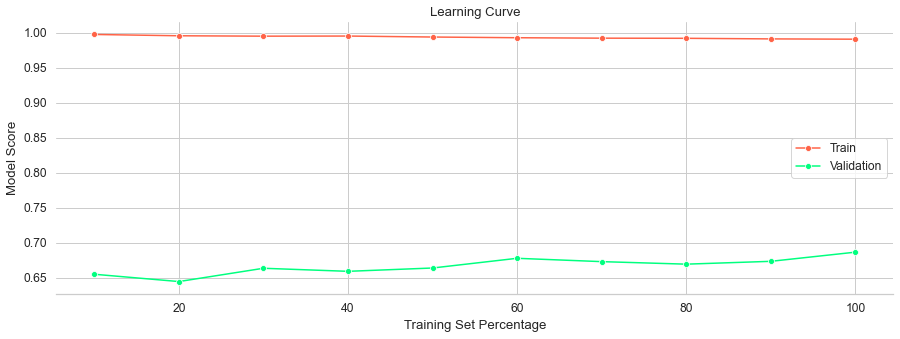

In [377]:
# XGBClassifier
 
# Print classifier's name:
print('XGBClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', XGBClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = mailout_train.copy()
df['RESPONSE'] = list(y.values)
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['RESPONSE']
rand_X = rand_df.drop(['RESPONSE'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

Clearly, the learning curves are not converging: the average score on the training set stands in high values, while validation scores are poor.

It means that the **XGBClassifier** is overfitting, and the model is not actually learning or generalizing, explaining the low scores in the validation set.

GradientBoostingClassifier
ROC_AUC train score: 0.90
ROC_AUC valid. score: 0.77


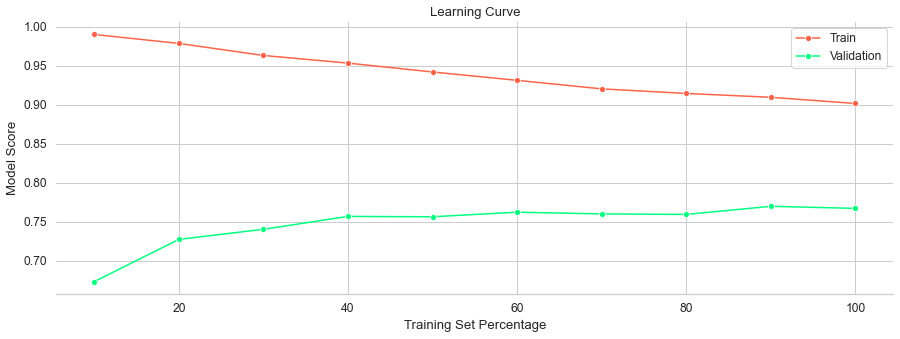

In [378]:
# GradientBoosting
 
# Print classifier's name:
print('GradientBoostingClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', GradientBoostingClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = mailout_train.copy()
df['RESPONSE'] = list(y.values)
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['RESPONSE']
rand_X = rand_df.drop(['RESPONSE'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

On the other hand, **GradientBoostingClassifier** represents a better option once the learning curves are converging, and the validation score is consistently improving while the algorithm receives more information.

AdaBoostClassifier
ROC_AUC train score: 0.84
ROC_AUC valid. score: 0.73


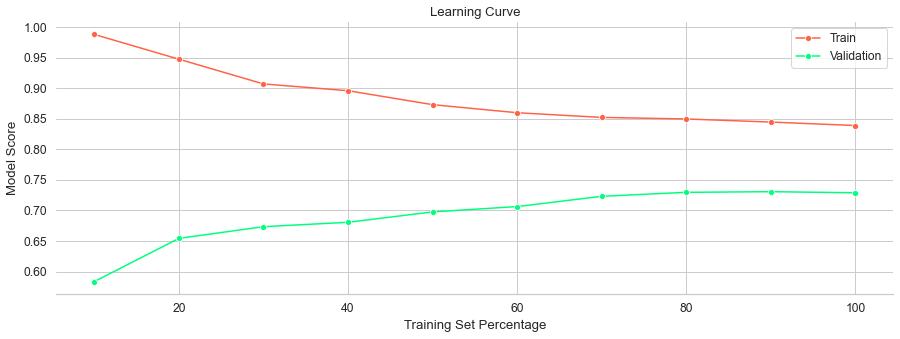

In [379]:
# AdaBoostClassifier
 
# Print classifier's name:
print('AdaBoostClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', AdaBoostClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = mailout_train.copy()
df['RESPONSE'] = list(y.values)
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['RESPONSE']
rand_X = rand_df.drop(['RESPONSE'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

**AdaBoostClassifier** shows a similar pattern when comparing to the GradientBoostingClassifier. However, its validation score was not as good.

Considering the models that didn't overfit, **GradientBoostingClassifier** seems a better option:
* learning curves seem to keep converging, showing perspective of improvements;
* validation score achieved higher values, indicating that it performs better on unseen data.

### 2.3 Training Classifier<a name="training"></a>

Now that the learning curve was observed for different algorithms, and the *GradientBoostingClassifier* was chosen as a better option, a few steps will be followed:
* defining data pipeline;
* setting different parameters for model tuning;
* *GridSearchCV* to optimize parameters' combination.

Since the data is highly unbalanced, the evaluation metric will be the `roc_auc` score.

#### 2.3.1 Training on Unbalanced Data<a name="t1"></a>

In this first attempt, the unbalance seen in the classes will not be treated.

In [380]:
# Defining machine learning pipeline:
gbc_ml_pipe = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', GradientBoostingClassifier(learning_rate = 0.1, 
                                       n_estimators = 150, 
                                       random_state = 301))
])

# Setting parameters to be tested:
params = {'clf__min_samples_split': [2, 4], 
          'clf__max_depth': [3, 5], 
          'clf__max_features': [None, 'auto']
}

# Grid search + ML pipleine:
gbc_clf = GridSearchCV(gbc_ml_pipe, param_grid = params, scoring = 'roc_auc', verbose = 2)

# Training model:
gbc_clf.fit(mailout_train, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 2.8min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 2.7min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 2.8min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 2.8min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 2.8min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4, total= 2.7min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4, total= 2.7min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_f

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 144.4min finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AKT_DAT_KL',
                                                                          'ALTER_HH',
                                                                          'ALTERSKATEGORIE_FEIN',
                                                                          'ANZ_HAUSHALTE_AKTIV',
                                                         

In [381]:
# Checking best parameters:
print(gbc_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(gbc_clf.best_score_))

{'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_split': 2}
Best ROC_AUC score: 0.76


In [418]:
# Saving model:
#filename = 'gbc_model.pkl'
#pickle.dump(gbc_clf, open(filename, 'wb'))

#### 2.3.2 Training on Balanced Data<a name="t2"></a>

In this second attempt, the `SMOTE` technique will be included in the machine learning pipeline. 

The purpose is to see if the `roc_auc` score increases, once the unbalance is treated.

In [408]:
# Defining machine learning pipeline:
gbc_smote_ml_pipe = Pipeline_imb(steps = [
    ('preprocessing', preproc), 
    ('smote', SMOTE(random_state = 501)),  
    ('clf', GradientBoostingClassifier(learning_rate = 0.1, 
                                       n_estimators = 150, 
                                       random_state = 501))
])

# Setting parameters to be tested:
params_smote = {'smote__sampling_strategy': [0.3, 0.5, 1.0], 
                'clf__min_samples_split': [2, 4], 
                'clf__max_depth': [3], 
                'clf__max_features': [None]
}

# Grid search + ML pipleine:
gbc_smote_clf = GridSearchCV(gbc_smote_ml_pipe, param_grid = params_smote, scoring = 'roc_auc', verbose = 2)

# Training model:
gbc_smote_clf.fit(mailout_train, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3, total= 4.4min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min remaining:    0.0s


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3, total= 4.6min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3, total= 4.4min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3, total= 4.5min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.3, total= 4.4min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.5 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, smote__sampling_strategy=0.5, total= 5.5mi

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 186.3min finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AKT_DAT_KL',
                                                                          'ALTER_HH',
                                                                          'ALTERSKATEGORIE_FEIN',
                                                                          'ANZ_HAUSHALTE_AKTIV',
                                                         

In [409]:
# Checking best parameters:
print(gbc_smote_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(gbc_smote_clf.best_score_))

{'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_split': 4, 'smote__sampling_strategy': 0.3}
Best ROC_AUC score: 0.70


This strategy to deal with the class unbalance didn't result in a better score. Because of that, in the next attempts, unbalance will not be treated.

#### 2.3.3 Using Information Level and PCA Transformation<a name="t3"></a>

In this third attempt, a similar approach used during the cluster analysis will be performed here. In this case, data will be treated differently not only considering the columns' dtypes, but also the information level related to the columns.

As an example, `person` information level will be split into:
* numerical features;
* categorical features;
* binary features.

In the most generic levels of information like `microcell` and `macrocell`, dimensionality reduction will be applied (`PCA` for numerical features, and `TruncatedSVD` for sparse matrix (categorical columns after the one-hot encoding process).

This way, when applied, the dimensionality reduction will result in components representing one single level of information.

In [464]:
# Updating info_level dictionary:
new_info_level = info_level.copy()

# Adding columns:
# Person:
new_info_level['person'].append('AGER_TYP')
new_info_level['person'].append('GEBURTSJAHR')

# Household:
new_info_level['household'].append('D19_GESAMT_ANZ_24')
new_info_level['household'].append('D19_GESAMT_DATUM')
new_info_level['household'].append('D19_GESAMT_OFFLINE_DATUM')
new_info_level['household'].append('D19_GESAMT_ONLINE_DATUM')
new_info_level['household'].append('D19_KONSUMTYP')
new_info_level['household'].append('D19_KONSUMTYP_MAX')
new_info_level['household'].append('D19_SONSTIGE')
new_info_level['household'].append('D19_SOZIALES')
new_info_level['household'].append('D19_VERSAND_DATUM')
new_info_level['household'].append('D19_VERSAND_OFFLINE_DATUM')
new_info_level['household'].append('D19_VOLLSORTIMENT')

# Macrocell:
new_info_level['macrocell'].append('EXTSEL992')

In [466]:
# Dividing Person features into numerical, categorical and binary:
pers_num_features = list()

pers_cat_features = list()

pers_bin_features = list()

# Adding columns to lists:
for pers_col in new_info_level['person']:
    try:
        dtype = new_dtypes_dict[pers_col]
    except:
        dtype = new_feat_dtypes_dict[pers_col]
    
    if dtype == 'num':
        pers_num_features.append(pers_col)
    elif dtype == 'cat':
        pers_cat_features.append(pers_col)
    else:
        pers_bin_features.append(pers_col)

In [470]:
# Dividing Household features into numerical, categorical and binary:
hh_num_features = list()

hh_cat_features = list()

hh_bin_features = list()

# Adding columns to lists:
for hh_col in new_info_level['household']:
    try:
        dtype = new_dtypes_dict[hh_col]
    except:
        dtype = new_feat_dtypes_dict[hh_col]
    
    if dtype == 'num':
        hh_num_features.append(hh_col)
    elif dtype == 'cat':
        hh_cat_features.append(hh_col)
    else:
        hh_bin_features.append(hh_col)

In [474]:
# Dividing Microcell features into numerical, categorical and binary:
mic_num_features = list()

mic_cat_features = list()

mic_bin_features = list()

# Adding columns to lists:
for mic_col in new_info_level['microcell']:
    try:
        dtype = new_dtypes_dict[mic_col]
    except:
        dtype = new_feat_dtypes_dict[mic_col]
    
    if dtype == 'num':
        mic_num_features.append(mic_col)
    elif dtype == 'cat':
        mic_cat_features.append(mic_col)
    else:
        mic_bin_features.append(mic_col)

In [478]:
# Dividing Macrocell features into numerical, categorical and binary:
mac_num_features = list()

mac_cat_features = list()

mac_bin_features = list()

# Adding columns to lists:
for mac_col in new_info_level['macrocell']:
    try:
        dtype = new_dtypes_dict[mac_col]
    except:
        dtype = new_feat_dtypes_dict[mac_col]
    
    if dtype == 'num':
        mac_num_features.append(mac_col)
    elif dtype == 'cat':
        mac_cat_features.append(mac_col)
    else:
        mac_bin_features.append(mac_col)

In [482]:
# Dividing Community features into numerical, categorical and binary:
com_num_features = list()

com_cat_features = list()

com_bin_features = list()

# Adding columns to lists:
for com_col in new_info_level['community']:
    try:
        dtype = new_dtypes_dict[com_col]
    except:
        dtype = new_feat_dtypes_dict[com_col]
    
    if dtype == 'num':
        com_num_features.append(com_col)
    elif dtype == 'cat':
        com_cat_features.append(com_col)
    else:
        com_bin_features.append(com_col)

In [501]:
# Pipeline for treating nan values and applying PCA to different information levels:

# PERSON level:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
# pers_num_features 
pers_num_transformer = Pipeline(steps = [
    ('pers_num_imputer', SimpleImputer(strategy = 'median')), 
    ('pers_num_scaler', StandardScaler())
])

# Categorical features will be one-hot-encoded:
# pers_cat_features 
pers_cat_transformer = Pipeline(steps = [
    ('pers_cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('pers_cat_ohe', OneHotEncoder(handle_unknown = 'ignore')), 
    ('pers_cat_pca', TruncatedSVD(n_components = 9, random_state = 701))
])

# Binary features with nan values will also be one-hot-encoded:
# pers_bin_features 
pers_bin_transformer = Pipeline(steps = [
    ('pers_bin_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('pers_bin_ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [502]:
# HOUSEHOLD level:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
# hh_num_features
hh_num_transformer = Pipeline(steps = [
    ('hh_num_imputer', SimpleImputer(strategy = 'median')), 
    ('hh_num_scaler', StandardScaler())
])

# Categorical features will be one-hot-encoded:
# hh_cat_features
hh_cat_transformer = Pipeline(steps = [
    ('hh_cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('hh_cat_ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [503]:
# MICROCELL level:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
# mic_num_features
mic_num_transformer = Pipeline(steps = [
    ('mic_num_imputer', SimpleImputer(strategy = 'median')), 
    ('mic_num_scaler', StandardScaler()), 
    ('mic_num_pca', PCA(n_components = 6, random_state = 702))
])

# Categorical features will be one-hot-encoded:
# mic_cat_features
mic_cat_transformer = Pipeline(steps = [
    ('mic_cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('mic_cat_ohe', OneHotEncoder(handle_unknown = 'ignore')), 
    ('mic_cat_pca', TruncatedSVD(n_components = 2, random_state = 703))
])

# Binary features with nan values will also be one-hot-encoded:
# mic_bin_features
mic_bin_transformer = Pipeline(steps = [
    ('mic_bin_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('mic_bin_ohe', OneHotEncoder(handle_unknown = 'ignore')), 
    ('mic_bin_pca', TruncatedSVD(n_components = 2, random_state = 704))
])

In [504]:
# MACROCELL level:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
# mac_num_features
mac_num_transformer = Pipeline(steps = [
    ('mac_num_imputer', SimpleImputer(strategy = 'median')), 
    ('mac_num_scaler', StandardScaler()), 
    ('mac_num_pca', PCA(n_components = 8, random_state = 705))
])

# Categorical features will be one-hot-encoded:
# mac_cat_features
mac_cat_transformer = Pipeline(steps = [
    ('mac_cat_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('mac_cat_ohe', OneHotEncoder(handle_unknown = 'ignore')), 
    ('mac_cat_pca', TruncatedSVD(n_components = 2, random_state = 706))
])

# Binary features with nan values will also be one-hot-encoded:
# mac_bin_features
mac_bin_transformer = Pipeline(steps = [
    ('mac_bin_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('mac_bin_ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [505]:
# COMMUNITY level:
# Numerical features: nan values will be imputed using the 'median', and then StandardScaler will be applied:
# com_num_features
com_num_transformer = Pipeline(steps = [
    ('com_num_imputer', SimpleImputer(strategy = 'median')), 
    ('com_num_scaler', StandardScaler())
])

In [506]:
# Encapsulating transformations:
preproc_pca = ColumnTransformer(
    transformers = [
        ('pers_num', pers_num_transformer, pers_num_features), 
        ('pers_cat', pers_cat_transformer, pers_cat_features), 
        ('pers_bin', pers_bin_transformer, pers_bin_features), 
        ('hh_num', hh_num_transformer, hh_num_features), 
        ('hh_cat', hh_cat_transformer, hh_cat_features), 
        ('mic_num', mic_num_transformer, mic_num_features), 
        ('mic_cat', mic_cat_transformer, mic_cat_features), 
        ('mic_bin', mic_bin_transformer, mic_bin_features),
        ('mac_num', mac_num_transformer, mac_num_features), 
        ('mac_cat', mac_cat_transformer, mac_cat_features), 
        ('mac_bin', mac_bin_transformer, mac_bin_features),
        ('com_num', com_num_transformer, com_num_features)
    ])

In [497]:
# Concatenating selected columns:
selected_columns = pers_num_features + pers_cat_features + pers_bin_features + hh_num_features + hh_cat_features + mic_num_features + mic_cat_features + mic_bin_features + mac_num_features + mac_cat_features + mac_bin_features + com_num_features

In [507]:
# Defining machine learning pipeline:
gbc_pca_ml_pipe = Pipeline(steps = [
    ('preprocessing', preproc_pca), 
    ('clf', GradientBoostingClassifier(learning_rate = 0.1, 
                                       n_estimators = 150, 
                                       random_state = 701))
])

# Setting parameters to be tested:
params_pca = {'clf__min_samples_split': [2, 4], 
              'clf__max_depth': [3, 5], 
              'clf__max_features': [None]
}

# Grid search + ML pipleine:
gbc_pca_clf = GridSearchCV(gbc_pca_ml_pipe, param_grid = params_pca, scoring = 'roc_auc', verbose = 2)

# Training model:
gbc_pca_clf.fit(mailout_train[selected_columns], y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 1.3min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 1.1min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 1.1min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 1.2min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, total= 1.2min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4, total= 1.2min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4, total= 1.1min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=4 
[CV]  clf__max_depth=3, clf__max_f

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 31.0min finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pers_num',
                                                                         Pipeline(steps=[('pers_num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('pers_num_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ALTERSKATEGORIE_GROB',
                                                                          'CJT_KATALOGNUTZER',
                                                                          'CJT_TYP_6',
                                                                          'FINANZ_ANLEGER',
                               

In [508]:
# Checking best parameters:
print(gbc_pca_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(gbc_pca_clf.best_score_))

{'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_split': 4}
Best ROC_AUC score: 0.76


This approach resulted in a better score when comparing to the second approach, but still not as good as the first strategy.

#### 2.3.4 Using PCA Transformation<a name="t4"></a>

The fourth approach is a variation of the first one, but this time the dimensionality reduction will be applied to the data. Different from the third approach, information level will not be considered.

This way, the `PCA` algorithm will be applied along in the machine learning pipeline, and the components will represent the whole data.

In [521]:
# Defining machine learning pipeline:
gbc_pca2_pipe = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('pca', PCA(random_state = 901)),
    ('clf', GradientBoostingClassifier(learning_rate = 0.1, 
                                       n_estimators = 150, 
                                       random_state = 301))
])

# Setting parameters to be tested:
params_pca2 = {'pca__n_components': [70, 100, 150], 
               'clf__min_samples_split': [2, 4], 
               'clf__max_depth': [3], 
               'clf__max_features': [None]
}

# Grid search + ML pipleine:
gbc_pca2_clf = GridSearchCV(gbc_pca2_pipe, param_grid = params_pca2, scoring = 'roc_auc', verbose = 2)

# Training model:
gbc_pca2_clf.fit(mailout_train, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70, total= 2.0min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70, total= 1.9min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70, total= 1.9min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70, total= 1.9min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=70, total= 1.9min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=100 
[CV]  clf__max_depth=3, clf__max_features=None, clf__min_samples_split=2, pca__n_components=100, total= 2.8min
[CV] clf__max_depth=3, clf__max_features=None, clf__min_samples_spli

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 89.1min finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pers_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['AKT_DAT_KL',
                                                                          'ALTER_HH',
                                                                          'ALTERSKATEGORIE_FEIN',
                                                                          'ANZ_HAUSHALTE_AKTIV',
                                                    

In [522]:
# Checking best parameters:
print(gbc_pca2_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(gbc_pca2_clf.best_score_))

{'clf__max_depth': 3, 'clf__max_features': None, 'clf__min_samples_split': 4, 'pca__n_components': 100}
Best ROC_AUC score: 0.67


Considering the `roc_auc` metric, this strategy is the worst so far.

#### 2.3.5 XGBoost Classifier and Bayesian Optimization<a name="t5"></a>

This time, not only the algorithm will be changed, but also the parameter tuning approach will be changed.

Instead of the *Gradient Boosting Classifier*, the `XGBoost Classifier` will be trained on the data. The parameter tuning will be performed by the `BayesSearchCV` algorithm. Instead of simply testing all the parameter combinations, this algorithm test different parameters, given a range of possible values.

Once it shows improvement, the algorithm 'explores' deeper the areas that resulted in better performance.

In [534]:
# Defining machine learning pipeline:
xgbc_ml_pipe_bayes = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', XGBClassifier(random_state = 301))
])

# Setting parameters to be tested:
bayes_search_space = {'clf__booster': Categorical(['gbtree', 'dart']), 
                      'clf__learning_rate': Real(0.01, 0.3), 
                      'clf__gamma': Integer(0, 100), 
                      'clf__min_child_weight': Integer(0, 10),
                      'clf__reg_lambda': Integer(1, 100), 
                      'clf__reg_alpha': Integer(0, 100), 
                      'clf__tree_method': Categorical(['auto', 'hist']),
                      'clf__max_depth': Integer(2, 7)
}

# Defining function to display scores:
def show_score(optim_result):
    '''
    It shows iteration scores during Bayesian Optimization
    '''
    # Computing score:
    score = xgbc_bayes_clf.best_score_
    print('Best ROC_AUC Score:{}'.format(score))
    
    # Early stop:
    if score >= 0.81:
        print('At least 0.81 ROC_AUC score achieved!')
        
        return True

# Grid search + ML pipleine:
xgbc_bayes_clf = BayesSearchCV(xgbc_ml_pipe_bayes, bayes_search_space, scoring = 'roc_auc', cv = 5, verbose = 2)

# Training model:
xgbc_bayes_clf.fit(mailout_train, y, callback = show_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist, total=  28.0s
[CV] clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.0s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist, total=   5.1s
[CV] clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist, total=   4.9s
[CV] clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=47, clf__learning_rate=0.14648060643829094, clf__max_depth=3, clf__min_child_weight=6, clf__reg_alpha=26, clf__reg_lambda=39, clf__tree_method=hist, total=   5.3s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto, total=  16.3s
[CV] clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto, total=  16.1s
[CV] clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto, total=  18.3s
[CV] clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=89, clf__learning_rate=0.20727938348653657, clf__max_depth=4, clf__min_child_weight=1, clf__reg_alpha=80, clf__reg_lambda=84, clf__tree_method=auto, total=  20.3s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist, total=   7.9s
[CV] clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist, total=   8.1s
[CV] clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist, total=   8.1s
[CV] clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=9, clf__learning_rate=0.20192078833287422, clf__max_depth=5, clf__min_child_weight=2, clf__reg_alpha=62, clf__reg_lambda=87, clf__tree_method=hist, total=   7.4s
[CV] clf__booster=dart, clf__gamma=9, cl

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist, total=   6.7s
[CV] clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist, total=   6.8s
[CV] clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist, total=   6.7s
[CV] clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=20, clf__learning_rate=0.2412892033866403, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=79, clf__reg_lambda=18, clf__tree_method=hist, total=   6.8s
[CV] clf__booster=dart, clf__gamma=20, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist, total=   7.5s
[CV] clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist, total=   7.4s
[CV] clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist, total=   7.7s
[CV] clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=85, clf__learning_rate=0.1853191150676861, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=67, clf__reg_lambda=98, clf__tree_method=hist, total=   7.6s
[CV] clf__booster=dart, clf__gamma=85, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist, total=   7.6s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist, total=   7.4s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist, total=   7.3s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.12061361973583304, clf__max_depth=6, clf__min_child_weight=4, clf__reg_alpha=59, clf__reg_lambda=17, clf__tree_method=hist, total=   7.0s
[CV] clf__booster=dart, clf__gamma=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist, total=   5.4s
[CV] clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist, total=   5.8s
[CV] clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist, total=   6.0s
[CV] clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=88, clf__learning_rate=0.10600959856113588, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=7, clf__reg_lambda=20, clf__tree_method=hist, total=   5.8s
[CV] clf__booster=gbtree, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist, total=   8.0s
[CV] clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist, total=   7.5s
[CV] clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist, total=   7.1s
[CV] clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=91, clf__learning_rate=0.25965397544581925, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=71, clf__reg_lambda=5, clf__tree_method=hist, total=   7.0s
[CV] clf__booster=dart, clf__gamma=91, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto, total=  19.3s
[CV] clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.2s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto, total=  21.5s
[CV] clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto, total=  25.2s
[CV] clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=13, clf__learning_rate=0.1926887228738842, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=26, clf__reg_lambda=49, clf__tree_method=auto, total=  24.9s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto, total=  28.7s
[CV] clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto, total=  35.1s
[CV] clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto, total=  33.9s
[CV] clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=18, clf__learning_rate=0.2896261188303368, clf__max_depth=5, clf__min_child_weight=7, clf__reg_alpha=50, clf__reg_lambda=20, clf__tree_method=auto, total=  31.6s
[CV] clf__booster=dart, clf__gamma=18, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.7min finished


Best ROC_AUC Score:0.7584810241893813
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto, total=  15.9s
[CV] clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.8s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto, total=  21.0s
[CV] clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto, total=  26.3s
[CV] clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=90, clf__learning_rate=0.0288163324805367, clf__max_depth=4, clf__min_child_weight=0, clf__reg_alpha=92, clf__reg_lambda=72, clf__tree_method=auto, total=  26.6s
[CV] clf__booster=dart, clf__gamma=90, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


Best ROC_AUC Score:0.7584810241893813
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  21.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  18.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7631957029896815
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist, total=   6.6s
[CV] clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist, total=   6.4s
[CV] clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist, total=   6.9s
[CV] clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=91, clf__learning_rate=0.010573107318795478, clf__max_depth=6, clf__min_child_weight=9, clf__reg_alpha=17, clf__reg_lambda=34, clf__tree_method=hist, total=   5.8s
[CV] clf__booster=gb

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.7s finished


Best ROC_AUC Score:0.7631957029896815
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist, total=   9.1s
[CV] clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist, total=   9.2s
[CV] clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist, total=  10.1s
[CV] clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=72, clf__learning_rate=0.2419898767755905, clf__max_depth=4, clf__min_child_weight=8, clf__reg_alpha=46, clf__reg_lambda=27, clf__tree_method=hist, total=  10.5s
[CV] clf__booster=dart, clf__gamma=72, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.2s finished


Best ROC_AUC Score:0.7631957029896815
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.3s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.0s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.0s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=7, clf__re

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7631957029896815
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto, total=  20.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto, total=  19.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto, total=  20.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.20324772356549947, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=47, clf__tree_method=auto, total=  20.2s
[CV] clf__booster=gbtree, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  19.5s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  19.0s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.3s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.17701375429138308, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.3s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  19.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  19.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22749483686319236, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  20.8s
[CV] clf__booster=gbtree, clf__gamm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  18.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  21.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  21.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.08354511152108174, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  21.5s
[CV] clf__booster=gbtree, clf__gamm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist, total=   7.8s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist, total=   7.9s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist, total=   7.8s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.16614282699131797, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=hist, total=   7.3s
[CV] clf__booster=gbtree, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.7s finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto, total=  15.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto, total=  16.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto, total=  16.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=34, clf__reg_lambda=92, clf__tree_method=auto, total=  16.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto, total=  40.7s
[CV] clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.6s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto, total=  43.0s
[CV] clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto, total=  41.5s
[CV] clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=56, clf__learning_rate=0.18852334659591313, clf__max_depth=6, clf__min_child_weight=3, clf__reg_alpha=35, clf__reg_lambda=10, clf__tree_method=auto, total=  44.7s
[CV] clf__booster=dart, clf__gamma=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.6min finished


Best ROC_AUC Score:0.7715695797409721
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto, total=  26.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.2s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto, total=  26.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto, total=  26.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.23147217896202957, clf__max_depth=3, clf__min_child_weight=10, clf__reg_alpha=1, clf__reg_lambda=100, clf__tree_method=auto, total=  26.9s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist, total=   7.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist, total=   7.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist, total=   7.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7, clf__reg_alpha=18, clf__reg_lambda=100, clf__tree_method=hist, total=   7.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=7

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.5s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist, total=   6.8s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist, total=   6.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.22603850400836087, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=100, clf__tree_method=hist, total=   6.6s
[CV] clf__booster=gb

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.9s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   6.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.4s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   6.9s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.4s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.1s
[CV] clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   9.3s
[CV] clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.6s
[CV] clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.4s
[CV] clf__booster=dart, clf__gamma=30, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.3s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.9s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.9s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   9.0s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=7, clf__min_child_weight=1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.0s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  16.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  19.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  19.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.16725894003392772, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  21.1s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   6.9s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   7.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.04619896697956077, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   6.9s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.0s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  39.7s
[CV] clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  43.4s
[CV] clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  43.4s
[CV] clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=3, clf__learning_rate=0.15250425531045525, clf__max_depth=6, clf__min_child_weight=2, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  43.2s
[CV] clf__booster=dart, clf__gamma=3, cl

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.5min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  20.5s
[CV] clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  20.5s
[CV] clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  19.5s
[CV] clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  20.2s
[CV] clf__booster=dart, clf__gamma=2, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=9, clf__reg_alpha=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto, total=  23.6s
[CV] clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.5s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto, total=  25.7s
[CV] clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto, total=  26.1s
[CV] clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf__reg_alpha=42, clf__reg_lambda=86, clf__tree_method=auto, total=  25.6s
[CV] clf__booster=gbtree, clf__gamma=5, clf__learning_rate=0.3, clf__max_depth=3, clf__min_child_weight=4, clf

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.1s
[CV] clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.5s
[CV] clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.0s
[CV] clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=1, clf__learning_rate=0.17474628344148868, clf__max_depth=6, clf__min_child_weight=8, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.1s
[CV] clf__booster=gbtree, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.0s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   5.8s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   5.2s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   5.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   5.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.01, clf__max_depth=2, clf__mi

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.9s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   6.0s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   6.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   6.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=hist, total=   6.3s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.3, clf__max_depth=2, clf__min_chil

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.7s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.4s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.0s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   9.9s
[CV] clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=15, clf__learning_rate=0.2051298025031539, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.4s
[CV] clf__booster=dart, clf__gamma=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.2s finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  17.7s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  19.8s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  19.4s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  20.5s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto, total=  40.3s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.2s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto, total=  45.8s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto, total=  45.7s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1426330052033053, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=17, clf__reg_lambda=1, clf__tree_method=auto, total=  45.1s
[CV] clf__booster=dart, clf__gamma=0, clf__le

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  19.5s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  21.3s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  22.6s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  22.0s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_w

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  50.5s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.4s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  51.2s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  49.0s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.04250258683191236, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=1, clf__tree_method=auto, total=  51.0s
[CV] clf__booster=dart, clf__gamma=0, clf__le

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.1min finished


Best ROC_AUC Score:0.7716560724651446
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   9.4s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  11.6s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=  10.9s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.11216931481077255, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   8.9s
[CV] clf__booster=dart, clf__gamma=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.1s finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  15.4s
[CV] clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.3s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  15.6s
[CV] clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  16.1s
[CV] clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_child_weight=5, clf__reg_alpha=100, clf__reg_lambda=100, clf__tree_method=auto, total=  16.7s
[CV] clf__booster=gbtree, clf__gamma=42, clf__learning_rate=0.3, clf__max_depth=2, clf__min_chi

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  26.3s
[CV] clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.2s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  29.5s
[CV] clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  30.0s
[CV] clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=26, clf__learning_rate=0.09022770146509605, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=auto, total=  29.2s
[CV] clf__booster=gb

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto, total=  38.9s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.8s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto, total=  36.0s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto, total=  37.8s
[CV] clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=0, clf__learning_rate=0.1197423379562044, clf__max_depth=7, clf__min_child_weight=0, clf__reg_alpha=21, clf__reg_lambda=100, clf__tree_method=auto, total=  37.4s
[CV] clf__booster=dart, clf__gamma=0, cl

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto, total=  19.7s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto, total=  20.3s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto, total=  19.6s
[CV] clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=100, clf__learning_rate=0.14301429589540118, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=100, clf__reg_lambda=1, clf__tree_method=auto, total=  21.5s
[CV] clf__boost

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   5.5s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   5.7s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   5.6s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.2686973460829008, clf__max_depth=2, clf__min_child_weight=0, clf__reg_alpha=0, clf__reg_lambda=100, clf__tree_method=hist, total=   5.6s
[CV] clf__booster=gbtree, clf__gamm

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.4s finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto, total=  24.6s
[CV] clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.5s remaining:    0.0s


[CV]  clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto, total=  23.2s
[CV] clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto, total=  22.2s
[CV] clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto 
[CV]  clf__booster=dart, clf__gamma=100, clf__learning_rate=0.13228414361021829, clf__max_depth=7, clf__min_child_weight=10, clf__reg_alpha=43, clf__reg_lambda=99, clf__tree_method=auto, total=  23.0s
[CV] clf__booster=dart, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


Best ROC_AUC Score:0.7736004276929174
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto, total=  36.9s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.9s remaining:    0.0s


[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto, total=  40.1s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto, total=  36.4s
[CV] clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto 
[CV]  clf__booster=gbtree, clf__gamma=0, clf__learning_rate=0.19055176346262023, clf__max_depth=7, clf__min_child_weight=1, clf__reg_alpha=13, clf__reg_lambda=100, clf__tree_method=auto, total=  37.4s
[CV] clf__booster=gbtree,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


Best ROC_AUC Score:0.7736004276929174


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('pers_num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['AKT_DAT_KL',
                                                                           'ALTER_HH',
                                                                           'ALTERSKATEGORIE_FEIN',
                                                                           'ANZ_HAUSHALTE_AKTIV',
                      

In [535]:
# Checking best parameters:
print(xgbc_bayes_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(xgbc_bayes_clf.best_score_))

OrderedDict([('clf__booster', 'dart'), ('clf__gamma', 0), ('clf__learning_rate', 0.11216931481077255), ('clf__max_depth', 7), ('clf__min_child_weight', 10), ('clf__reg_alpha', 0), ('clf__reg_lambda', 100), ('clf__tree_method', 'hist')])
Best ROC_AUC score: 0.77


This strategy resulted in a score similar to the first one.

Since the first one was the best model so far, this new Bayesian Optimization approach will be performed in a few more algorithms.

In [540]:
# Saving model:
#filename = 'xgbc_bayes_model.pkl'
#pickle.dump(xgbc_bayes_clf, open(filename, 'wb'))

#### 2.3.6 LightGBM and Bayesian Optimization<a name="t6"></a>

`LightGBM Classifier` is similar to the *XGBoost Classifier*, but is considered faster. Besides that, it splits its trees leaf-wise, rather than depth or level-wise like most of the other similar algorithms.

In [547]:
# Defining machine learning pipeline:
lgbm_ml_pipe_bayes = Pipeline(steps = [
    ('preprocessing', preproc), 
    ('clf', LGBMClassifier(random_state = 301))
])

# Setting parameters to be tested:
lgbm_bayes_search_space = {'clf__boosting_type': Categorical(['gbdt', 'dart', 'goss']), 
                           'clf__num_leaves': Integer(5, 100), 
                           'clf__max_depth': Integer(2, 200), 
                           'clf__learning_rate': Real(0.01, 0.5), 
                           'clf__n_estimators': Integer(100, 500), 
                           'clf__min_child_samples': Integer(10, 80), 
                           'clf__reg_alpha': Integer(0, 100), 
                           'clf__reg_lambda': Integer(0, 100)
}

# Defining function to display scores:
def lgbm_show_score(optim_result):
    '''
    It shows iteration scores during Bayesian Optimization
    '''
    # Computing score:
    score = lgbm_bayes_clf.best_score_
    print('\nBest ROC_AUC Score: {}.\n'.format(score))
    
    # Early stop:
    if score >= 0.81:
        print('At least 0.81 ROC_AUC score achieved!')
        
        return True

# Grid search + ML pipleine:
lgbm_bayes_clf = BayesSearchCV(lgbm_ml_pipe_bayes, lgbm_bayes_search_space, scoring = 'roc_auc', cv = 5, verbose = 2)

# Training model:
lgbm_bayes_clf.fit(mailout_train, y, callback = lgbm_show_score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61, total=   5.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61, total=   5.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90, clf__reg_lambda=61 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4384971918321528, clf__max_depth=106, clf__min_child_samples=12, clf__n_estimators=359, clf__num_leaves=45, clf__reg_alpha=90,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4, total=   6.3s
[CV] clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4, total=   6.4s
[CV] clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4, total=   6.2s
[CV] clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf__reg_lambda=4 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.13920455006065002, clf__max_depth=51, clf__min_child_samples=24, clf__n_estimators=230, clf__num_leaves=28, clf__reg_alpha=67, clf

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12, total=   7.4s
[CV] clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12, total=   6.4s
[CV] clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12, total=   6.3s
[CV] clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69, clf__reg_lambda=12 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.15875065478552566, clf__max_depth=98, clf__min_child_samples=64, clf__n_estimators=476, clf__num_leaves=56, clf__reg_alpha=69,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7, total=   4.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7, total=   5.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7, total=   4.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15, clf__reg_lambda=7 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.06714049712500797, clf__max_depth=178, clf__min_child_samples=43, clf__n_estimators=174, clf__num_leaves=40, clf__reg_alpha=15

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74, total=   7.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74, total=   6.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74, total=   8.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf__reg_lambda=74 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.2723289131797826, clf__max_depth=191, clf__min_child_samples=67, clf__n_estimators=239, clf__num_leaves=85, clf__reg_alpha=5, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74, total=   8.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74, total=   9.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74, total=  10.0s
[CV] clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf__reg_lambda=74 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.0554218358061121, clf__max_depth=50, clf__min_child_samples=47, clf__n_estimators=425, clf__num_leaves=57, clf__reg_alpha=73, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73, total=   5.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73, total=   4.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73, total=   4.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16, clf__reg_lambda=73 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.48082087352611186, clf__max_depth=41, clf__min_child_samples=27, clf__n_estimators=141, clf__num_leaves=19, clf__reg_alpha=16,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88, total=   7.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88, total=   7.8s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88, total=   7.0s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_lambda=88 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.3243044445636061, clf__max_depth=63, clf__min_child_samples=39, clf__n_estimators=209, clf__num_leaves=84, clf__reg_alpha=7, clf__reg_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69, total=   6.0s
[CV] clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69, total=   6.0s
[CV] clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69, total=   7.1s
[CV] clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50, clf__reg_lambda=69 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.4333929271630282, clf__max_depth=117, clf__min_child_samples=54, clf__n_estimators=340, clf__num_leaves=87, clf__reg_alpha=50,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52, total=   4.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52, total=   4.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52, total=   4.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91, clf__reg_lambda=52 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.26357014361859515, clf__max_depth=27, clf__min_child_samples=77, clf__n_estimators=103, clf__num_leaves=63, clf__reg_alpha=91,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.1s finished



Best ROC_AUC Score: 0.7606844667785783.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   6.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=58, clf__n_estimators=214, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.6s finished



Best ROC_AUC Score: 0.763394692526818.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43, total=   4.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43, total=   4.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43, total=   4.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=43, total=   4.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__m

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.3s finished



Best ROC_AUC Score: 0.763394692526818.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=161, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.4s finished



Best ROC_AUC Score: 0.7659322010888151.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0, total=   4.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0, total=   4.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0, total=   5.3s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=0, total=   5.0s
[CV] clf__boosting_type=goss, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s finished



Best ROC_AUC Score: 0.7659322010888151.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   5.3s
[CV] clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.3s
[CV] clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.3s
[CV] clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=dart, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.8s
[CV] clf__boosting_type=dart, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s finished



Best ROC_AUC Score: 0.7659322010888151.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  10.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  12.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  10.0s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  11.2s
[CV] clf__boosting_type=goss, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.8s finished



Best ROC_AUC Score: 0.7659322010888151.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=500, clf__num_leaves=24, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.9s
[CV] clf__boosting_type=gbdt, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.7s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38, total=   4.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38, total=   5.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38, total=   5.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92, clf__reg_lambda=38 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.010630030971924486, clf__max_depth=75, clf__min_child_samples=33, clf__n_estimators=196, clf__num_leaves=6, clf__reg_alpha=92,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=28, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.1s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100, total=   9.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100, total=   9.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100, total=  11.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=23, clf__reg_alpha=0, clf__reg_lambda=100, total=   9.8s
[CV] clf__boosting_type=gbdt, clf__

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.7s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=21, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=27, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.9s
[CV] clf__boosting_type=gbdt, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished



Best ROC_AUC Score: 0.767400268880812.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0, total=   6.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=270, clf__num_leaves=20, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.7s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32, total=   7.4s
[CV] clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32, total=   6.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32, total=   6.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_lambda=32 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.4967050286010837, clf__max_depth=14, clf__min_child_samples=30, clf__n_estimators=261, clf__num_leaves=7, clf__reg_alpha=99, clf__reg_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.9s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf__reg_lambda=20 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.4196527468322671, clf__max_depth=164, clf__min_child_samples=73, clf__n_estimators=109, clf__num_leaves=46, clf__reg_alpha=0, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.2s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0, total=   5.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0, total=   4.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=8, clf__reg_lambda=0, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learn

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.7s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.485631514636974, clf__max_depth=123, clf__min_child_samples=10, clf__n_estimators=380, clf__num_leaves=77, clf__reg_alpha=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.8s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=131, clf__min_child_samples=10, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.8s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.031787808535233844, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=229, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lamb

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.2s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13, total=   6.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13, total=   7.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13, total=   7.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=61, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=40, clf__reg_lambda=13, total=   6.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.5s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=32, clf__n_estimators=151, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.3s
[CV] clf__boosting_type=gbdt, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.2s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0, total=   6.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0, total=   5.9s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0, total=   6.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=271, clf__num_leaves=35, clf__reg_alpha=58, clf__reg_lambda=0, total=   7.6s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.7s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=   9.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=   8.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=  11.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=   9.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.5, c

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.5s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   7.8s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   7.4s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   7.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=299, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   7.2s
[CV] clf__boosting_type=g

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   38.0s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100, total=   7.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100, total=   7.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100, total=   7.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=27, clf__n_estimators=415, clf__num_leaves=100, clf__reg_alpha=4, clf__reg_lambda=100, total=   7.5s
[CV] clf__boosting_type=gbdt, clf__learn

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   36.0s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100, total=   5.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100, total=   6.0s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100, total=   6.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.46804982258353506, clf__max_depth=2, clf__min_child_samples=18, clf__n_estimators=294, clf__num_leaves=5, clf__reg_alpha=22, clf__

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.4s finished



Best ROC_AUC Score: 0.7678539240534594.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34, total=   6.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34, total=   6.4s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34, total=   6.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=72, clf__n_estimators=329, clf__num_leaves=59, clf__reg_alpha=0, clf__reg_lambda=34, total=   6.7s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.5s finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100, total=   8.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100, total=   7.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=51, clf__n_estimators=426, clf__num_leaves=82, clf__reg_alpha=0, clf__reg_lambda=100, total=   8.3s
[CV] clf__boosting_type=gbdt, clf__learning_r

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.5s finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   4.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.6s finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  11.2s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=   9.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  12.8s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=0, clf__reg_lambda=100, total=  11.4s
[CV] clf__boosting_type=goss, clf__learn

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   57.3s finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=  12.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=  16.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0, total=  12.8s
[CV] clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=0 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.126721872686069, clf__max_depth=200, clf__min_child_samples=14, clf__n_estimators=500, clf__num_leaves=100, clf__reg_alpha=0, clf__reg

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100, total=  12.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100, total=  12.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100, total=  15.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=66, clf__reg_alpha=0, clf__reg_lambda=100, total=  17.2s
[CV] clf__boosting_type=goss, clf__learn

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished



Best ROC_AUC Score: 0.7682905508408767.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53, total=   4.3s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53, total=   4.8s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53, total=   4.5s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=53 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.12816468556552413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=0, clf_

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.3s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=  12.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=  10.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100, total=  10.7s
[CV] clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.29121181124865836, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_a

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.8s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100, total=  10.4s
[CV] clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100, total=  10.5s
[CV] clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100, total=  10.5s
[CV] clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.2711506839117518, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=7, clf__

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.4s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100, total=   6.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100, total=   6.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100, total=   6.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.10527767211165422, clf__max_depth=2, clf__min_child_samples=75, clf__n_estimators=263, clf__num_leaves=100, clf__reg_alpha=0, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.9s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.1s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   4.9s
[CV] clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.5, clf__max_depth=2, clf__min_child_samples=43, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=100, clf__reg_lambda=100, total=   5.2s
[CV] clf__boosting_type=goss, clf__

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.5s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100, total=  10.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100, total=   9.0s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100, total=   9.0s
[CV] clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.01, clf__max_depth=200, clf__min_child_samples=36, clf__n_estimators=480, clf__num_leaves=5, clf__reg_alpha=99, clf__reg_lambda=100, total=   9.0s
[CV] clf__boosting_type=goss, clf__

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.5s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100, total=   4.2s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100, total=   4.1s
[CV] clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha=50, clf__reg_lambda=100 
[CV]  clf__boosting_type=gbdt, clf__learning_rate=0.09203127099929413, clf__max_depth=2, clf__min_child_samples=80, clf__n_estimators=100, clf__num_leaves=100, clf__reg_alpha

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.5s finished



Best ROC_AUC Score: 0.7700890451570835.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100, total=   9.6s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100, total=   9.4s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100, total=   9.3s
[CV] clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, clf__reg_lambda=100 
[CV]  clf__boosting_type=goss, clf__learning_rate=0.3493398011677095, clf__max_depth=200, clf__min_child_samples=10, clf__n_estimators=500, clf__num_leaves=5, clf__reg_alpha=20, 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.5s finished



Best ROC_AUC Score: 0.7700890451570835.



BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('pers_num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['AKT_DAT_KL',
                                                                           'ALTER_HH',
                                                                           'ALTERSKATEGORIE_FEIN',
                                                                           'ANZ_HAUSHALTE_AKTIV',
                      

In [558]:
# Checking best parameters:
print(lgbm_bayes_clf.best_params_)

# Checking best score:
print('Best ROC_AUC score: {:.2f}'.format(lgbm_bayes_clf.best_score_))

OrderedDict([('clf__boosting_type', 'gbdt'), ('clf__learning_rate', 0.12816468556552413), ('clf__max_depth', 2), ('clf__min_child_samples', 80), ('clf__n_estimators', 100), ('clf__num_leaves', 100), ('clf__reg_alpha', 0), ('clf__reg_lambda', 53)])
Best ROC_AUC score: 0.77


The *LightGBM Classifier* resulted in a slightly lower score in comparison to the last model, but their performances are comparable.

## Part 3: Kaggle Competition<a name="part3"></a>

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [511]:
# Load in the data:
#mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

# Loading test set:
mailout_test = joblib.load('test')

mailout_test.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [512]:
# Saving LNR object:
lnr = list(mailout_test.LNR.values)

# Applying data transformations on train set:
mailout_test = supervised_data_transformation(mailout_test, test_set = True)

mailout_test.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,CAMEO_INTL_FAM_STATUS,CAMEO_INTL_FAM_COMPOSITION,YOUTH_DECADE,AVANT_GARDE,CAMEO_DEU_REPRESENTATION
0,2.0,1.0,3.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0,...,9.0,3.0,3,1,4.0,1.0,3.0,4.0,1.0,3.0
1,NaN,1.0,NaN,0.0,20.0,0.0,0.0,1.0,21.0,0.0,...,9.0,5.0,3,1,4.0,3.0,1.0,6.0,0.0,1.0
2,2.0,9.0,8.0,11.0,2.0,0.0,0.0,4.0,2.0,0.0,...,9.0,4.0,3,2,4.0,4.0,1.0,6.0,1.0,0.0
3,NaN,7.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,9.0,2.0,3,2,4.0,1.0,3.0,6.0,0.0,3.0
4,1.0,1.0,NaN,13.0,1.0,0.0,0.0,4.0,1.0,0.0,...,9.0,7.0,4,2,4.0,3.0,1.0,7.0,0.0,1.0


### 3.1 Attempt 1: Training on Unbalanced Data<a name="p1"></a>

In [396]:
# Predicting on teste data:
y_gbc_pred = gbc_clf.predict_proba(mailout_test)

In [405]:
# Creating prediction dataframe:
gbc_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
gbc_pred_df['LNR'] = lnr

# Assigning predictions:
gbc_pred_df['RESPONSE'] = y_gbc_pred[:, 1]

gbc_pred_df.head()

,LNR,RESPONSE
0,1754,0.025485
1,1770,0.025533
2,1465,0.001366
3,1470,0.004285
4,1478,0.001381


In [406]:
# Saving person predictions csv:
gbc_pred_df.to_csv('gbc_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.79488

Considering the `Kaggle` rank, this first approach could be considered a regular model, being positioned among the **top 150**.

### 3.2 Attempt 2: Training on Balanced Data<a name="p2"></a>

In [411]:
# Predicting on teste data:
y_gbc_smote_pred = gbc_smote_clf.predict_proba(mailout_test)

In [412]:
# Creating prediction dataframe:
gbc_smote_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
gbc_smote_pred_df['LNR'] = lnr

# Assigning predictions:
gbc_smote_pred_df['RESPONSE'] = y_gbc_smote_pred[:, 1]

gbc_smote_pred_df.head()

,LNR,RESPONSE
0,1754,0.033501
1,1770,0.011631
2,1465,0.003735
3,1470,0.007278
4,1478,0.004758


In [413]:
# Saving person predictions csv:
gbc_smote_pred_df.to_csv('gbc_smote_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.70165

### 3.3 Attempt 3: Information Level and PCA Transformation<a name="p3"></a>

In [513]:
# Predicting on teste data:
y_gbc_pca_pred = gbc_pca_clf.predict_proba(mailout_test[selected_columns])

In [514]:
# Creating prediction dataframe:
gbc_pca_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
gbc_pca_pred_df['LNR'] = lnr

# Assigning predictions:
gbc_pca_pred_df['RESPONSE'] = y_gbc_pca_pred[:, 1]

gbc_pca_pred_df.head()

,LNR,RESPONSE
0,1754,0.036327
1,1770,0.037246
2,1465,0.003483
3,1470,0.002662
4,1478,0.001923


In [515]:
# Saving person predictions csv:
gbc_pca_pred_df.to_csv('gbc_pca_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.79168

### 3.4 Attempt 4: PCA Transformation<a name="p4"></a>

In [524]:
# Predicting on teste data:
y_gbc_pca2_pred = gbc_pca2_clf.predict_proba(mailout_test)

In [525]:
# Creating prediction dataframe:
gbc_pca2_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
gbc_pca2_pred_df['LNR'] = lnr

# Assigning predictions:
gbc_pca2_pred_df['RESPONSE'] = y_gbc_pca2_pred[:, 1]

gbc_pca2_pred_df.head()

,LNR,RESPONSE
0,1754,0.017526
1,1770,0.017424
2,1465,0.003326
3,1470,0.001666
4,1478,0.002469


In [526]:
# Saving person predictions csv:
gbc_pca2_pred_df.to_csv('gbc_pca2_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.71402

### 3.5 Attempt 5: XGBoost Classifier and Baysian Optimization<a name="p5"></a>

In [537]:
# Predicting on teste data:
y_xgbc_bayes_pred = xgbc_bayes_clf.predict_proba(mailout_test)

In [538]:
# Creating prediction dataframe:
xgbc_bayes_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
xgbc_bayes_pred_df['LNR'] = lnr

# Assigning predictions:
xgbc_bayes_pred_df['RESPONSE'] = y_xgbc_bayes_pred[:, 1]

xgbc_bayes_pred_df.head()

,LNR,RESPONSE
0,1754,0.030338
1,1770,0.028605
2,1465,0.002802
3,1470,0.002978
4,1478,0.003458


In [539]:
# Saving person predictions csv:
xgbc_bayes_pred_df.to_csv('xgbc_bayes_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.80492

Although this model `roc_auc` score is comparable to the first model, when predicting on the test data, it represented a great advance.

This score positions the model among the **top 40** in the Kaggle rank among 349 data scientists.

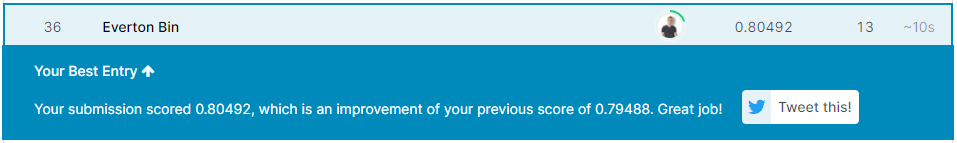

### 3.6 LightGBM and Bayesian Optimization<a name="p6"></a>

In [548]:
# Predicting on teste data:
y_lgbm_bayes_pred = lgbm_bayes_clf.predict_proba(mailout_test)

In [549]:
# Creating prediction dataframe:
lgbm_bayes_pred_df = pd.DataFrame(columns = ['LNR', 'RESPONSE'])

# Assigning id:
lgbm_bayes_pred_df['LNR'] = lnr

# Assigning predictions:
lgbm_bayes_pred_df['RESPONSE'] = y_lgbm_bayes_pred[:, 1]

lgbm_bayes_pred_df.head()

,LNR,RESPONSE
0,1754,0.032224
1,1770,0.035825
2,1465,0.002535
3,1470,0.003247
4,1478,0.002166


In [550]:
# Saving person predictions csv:
lgbm_bayes_pred_df.to_csv('lgbm_bayes_pred.csv', header = True, index = False)

# KAGGLE SCORE: 0.79743

## 4. Conclusion<a name="conclusion"></a>

This project represented a great challenge, especially because of the amount of data and different features to consider. 

Besides that, it is **real data**, meaning that it resembles in many aspects the challenges of a usual Data Science project at any company. 

More than evaluating different algorithms' learning curves, I have to say that my own learning curve has increased exponentially during this project, and it's far from overfitting, although the convergence will still be in process - and that is how it has to be, given the fact that, as data scientists, we need to incorporate the ongoing learning as a lifestyle.

There is plenty of space for improvements in the project, and a few of them will be listed as possible approaches:
* instead of using all of the features (after deleting the ones with a high proportion of missing values), there could be done a feature importance analysis, selecting only the ones that are more relevant for the task;

* observations containing a large number of missing values could be deleted;

* during data transformation, many steps could be performed differently: instead of the median, numerical imputation could follow a different rule, or the missing values could be inferred based on other features; 

* categorical features don't necessarily need to have their missing values imputed, instead they could be transformed into dummy variables and the missing values would be indirectly considered. In case they hold some information, this could represent improvement in the results;

* when scaling numerical features, different approaches could be tested as an alternative to the StandardScaler chosen for this project;

* different algorithms and hyperparameter tuning techniques could be tested;

* more feature engineering could be developed to come out with hidden information or boosting important aspects that represent the different customers.

About the project, there are a few things that I would like to highlight:
* it is fascinating how much data can tell about people, especially in a customer segmentation project, making it possible for us to understand where they live, how much they earn, what they like, and also how they THINK;

* developing a project like this is more than applying techniques, but also about being curious and asking the right questions;

* more important than finding the right answers to the right questions is to understand how valuable that information can be, and what can be actually done with it.